# [Ask the Expert: How can I Integrate SAS® and Open Source for Analytics and Machine Learning?](https://www.sas.com/en_us/webinars/integrate-sas-open-source.html)

## Part 1 - Data Exploration and Preparation with Python and SAS Viya (this notebook)
1. Data exploration and preparation in SAS Viya using the Python SWAT package.
2. Integration with SAS Visual Analytics to work with the final data.

## Part 2 - Machine Learning with Viya and Open Source
1. How Viya was designed to integrate with open source languages and packages to enable development and deployment of superior models for your organization.
2. The key integration points between Viya and open source.
3. How open source developers can take advantage of the massively parallel processing Cloud Analytics Services in-memory engine of Viya to speed model development against large data.

In [1]:
from IPython.display import Image
def display_image(img):
    ''' Display images for presentation'''
    return Image(url=r'https://raw.githubusercontent.com/pestyld/Python-Integration-to-SAS-Viya/master/images/' + img, embed=True)

'Part 1 - Data Preparation and Exploration Using Python and Visual Analtyics'

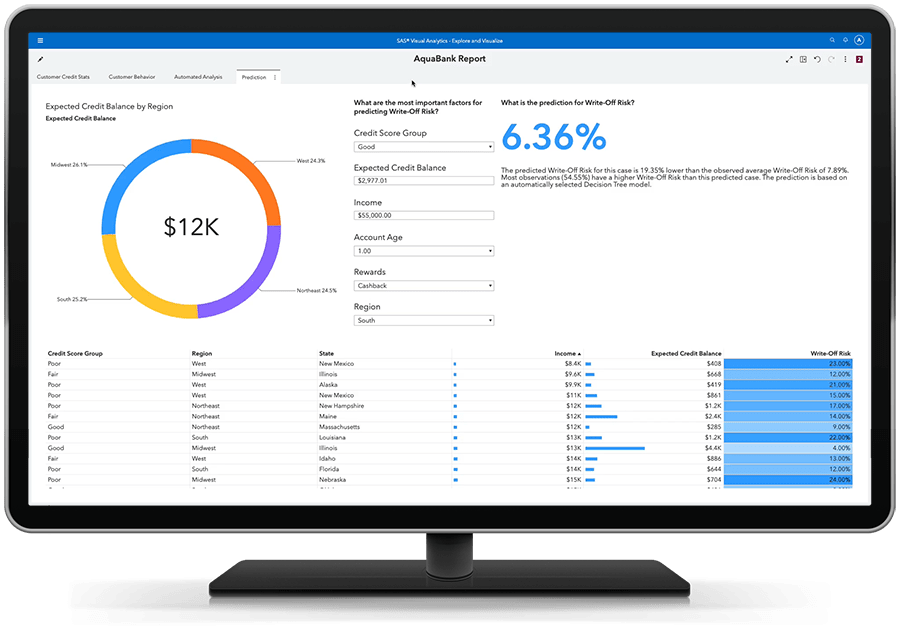

In [2]:
display('Part 1 - Data Preparation and Exploration Using Python and Visual Analtyics', display_image('00_VA_Basic.png'))

'Part 2 - Machine Learning on the Final Data'

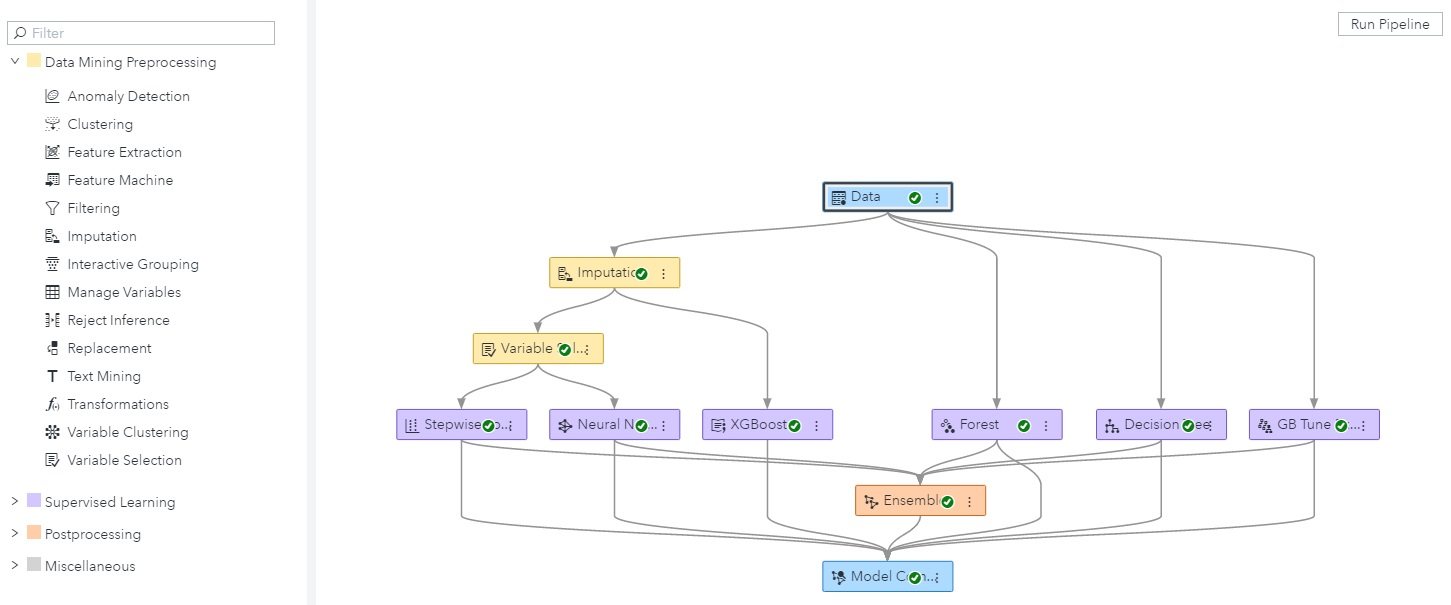

In [3]:
display('Part 2 - Machine Learning on the Final Data', display_image('00_Model_Studio.png'))

## Introduction to SAS Viya

### SAS Viya Overview

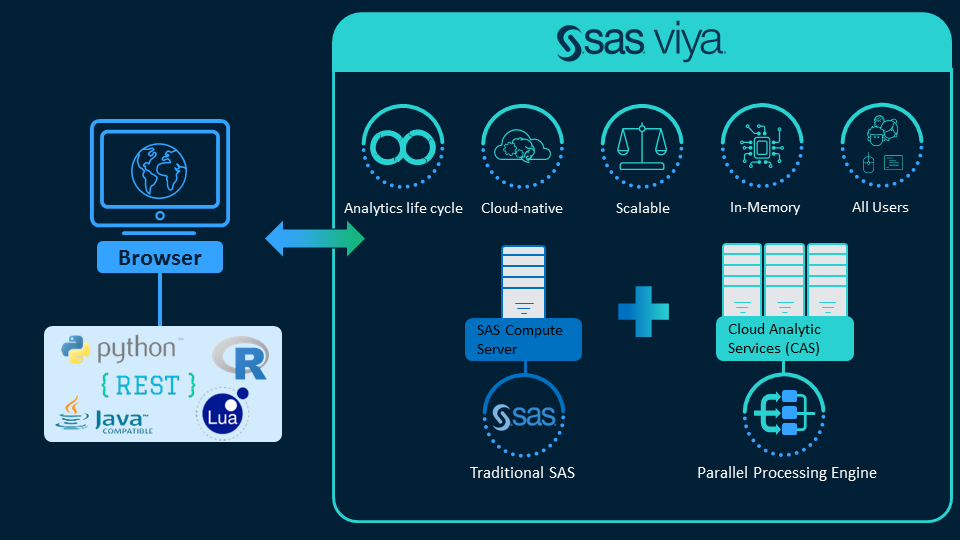

In [4]:
display_image('01_Viya_Overview.png')

**Expand notes below each slide for more information**


SAS Viya contains a variety of applications to process your data through the entirety of the analytics life cycle, but SAS Viya is much more than that. It's
 also cloud native, allowing scalable, web-based access to quick, accurate, and reliable analytical insights. 
Its in-memory engine and parallel processing capabilities can significantly improve the execution speed of your analytics. 
In its entirety, SAS Viya is a collaborative environment for all users. It enables everyone – data scientists, business analysts, developers, report viewers and executives alike – to collaborate, scale, and operationalize insights. 

How does all of this happen? SAS Viya includes multiple servers. The SAS Compute Server and SAS Cloud Analytic Services, or the CAS server for short. 
The SAS Compute Server enables you to execute traditional SAS code. The SAS Compute Server is the Viya equivalent of the SAS®9 workspace server. 

Then there’s the CAS server.  CAS has a massively parallel processing (MPP) architecture that is appropriate for analyzing big data and resource-intensive programs. It performs parallel processing on resident in-memory data to boost performance and produce lightning-fast results. It is optimal for big data and resource-intensive programs like machine learning. In this course, we focus on working with the CAS server in SAS Viya. 

All of these features are accessed from a web browser, and SAS Viya provides integration with open-source languages like Python, R, REST, JAVA, and LUA.

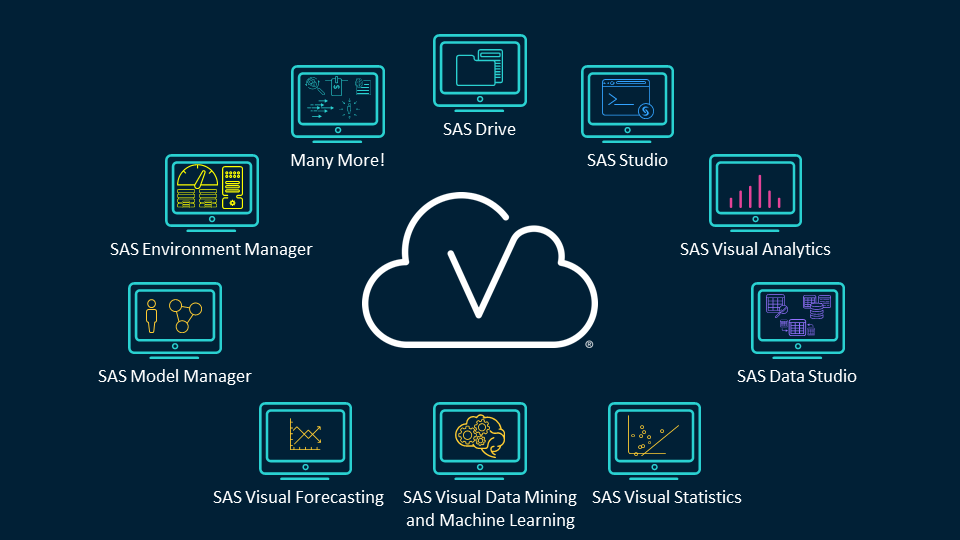

In [5]:
display_image('02_Viya_Apps.png')

SAS Viya consists of many applications that enable you to work with your data no matter your job role or skill level. This can be done through the collection of integrated AI, analytic, and data management solutions in SAS Viya.

- The entry point for SAS Viya is **SAS Drive**, a collaborative interface for accessing, organizing, and sharing content. This application is the gateway to all other applications in SAS Viya. 
- **SAS Studio** is the interactive development environment (IDE) in SAS Viya that enables you to program, build flows, and even use point-and-click tools to process your data. 
- **SAS Visual Analytics** enables you to visualize data, build statistical models, and create interactive dashboards with an easy-to-use point-and-click interface.  
- **SAS Data Studio** is the data preparation application that enables you to easily prepare data using point-and-click transforms. It also enables you to easily embed custom code if necessary.
- **SAS Visual Statistics**, **SAS Visual Data Mining and Machine Learning**, and **SAS Visual Forecasting** are applications built for data scientists. Users can interactively create and refine predictive machine learning models and forecasts. 
- **SAS Model Manager** streamlines the model life cycle 
- **SAS Environment Manager** manages the entire environment. 

These are just a few of the many applications available in SAS Viya. All of these applications enable individuals in an organization to work with data.


### CAS Server Overview

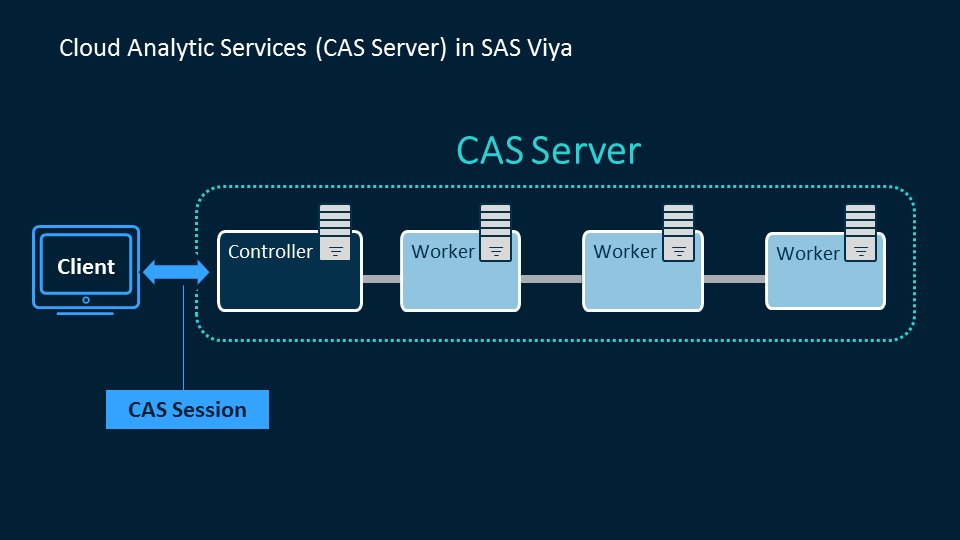

In [6]:
display_image('03_CAS_Overview1.png')

The CAS server is the cloud-native, high-performance in-memory analytics and massively parallel processing engine. The CAS server is configured to run on multiple machines. Typically, you will have one controller node and several worker nodes. You need to make a connection to the CAS server from your client. This is called a CAS session or CAS connection. 

SAS Documentation - [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)

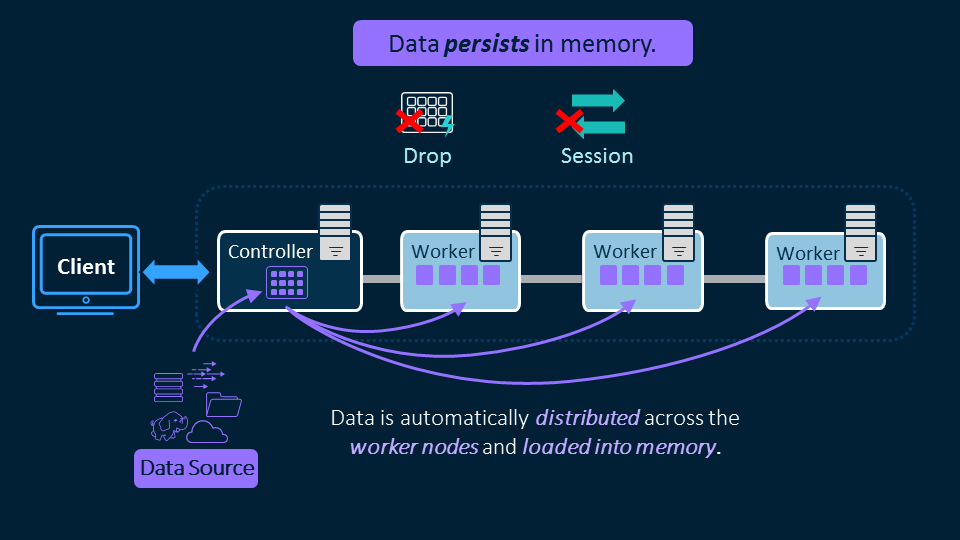

In [7]:
display_image('03_CAS_Overview2.png')

For data to be processed in CAS, data is copied into memory from some data source, and data blocks are automatically distributed across the worker nodes and loaded into memory. This is called serial loading. Once data is loaded into memory it persists in memory until explicitly dropped or the CAS session ends. 

You can also load data into memory in parallel. View the following resources for additional information:
- [Five Approaches for High-Performance Data Loading to the SAS® Cloud Analytic Services Server](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2018/1854-2018.pdf)
-[Parallel data load to SAS Viya](https://communities.sas.com/t5/SAS-Communities-Library/Parallel-data-load-to-SAS-Viya/ta-p/361318#:~:text=In%20SAS%C2%AE%20Viya%E2%84%A2,sets%20into%20the%20CAS%20server.)
- [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)]
- [How to Parallel Load and Compress a SAS® Cloud Analytic Services (CAS) Table](https://blogs.sas.com/content/sgf/2019/10/17/how-to-parallel-load-and-compress-a-sas-cloud-analytic-services-cas-table/)

If you persist the data in memory, it enables multiple users to access the same in-memory table without any additional I/O (data load from disk to memory). Because I/O is more resource intensive, having data preloaded into memory speeds up the processing for all users.   

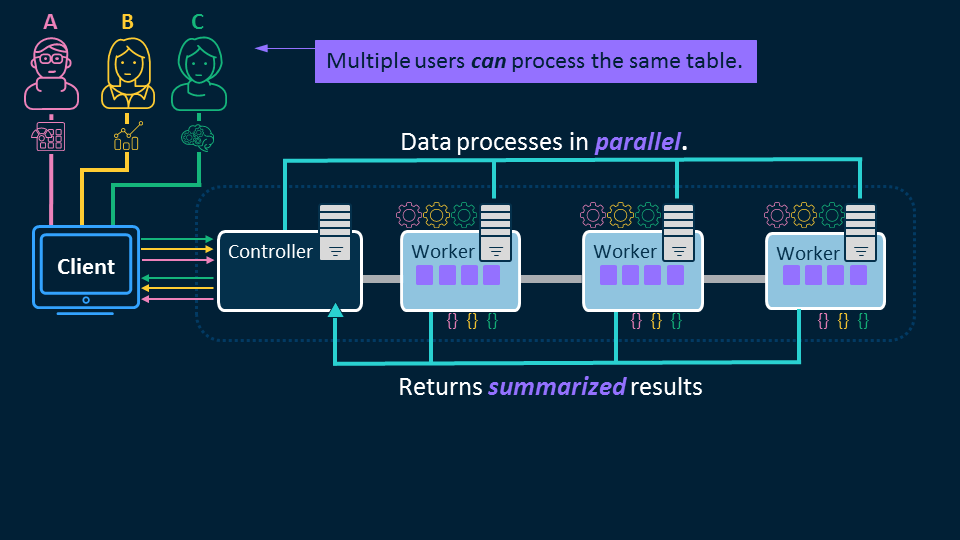

In [8]:
display_image('03_CAS_Overview3.png')

With CAS, multiple users can access the same in-memory table.

For example, person A can execute a variety of Python programs, person B can create dashboards using SAS Visual Analytics, and person C can execute machine learning models. All users can do this using the same in-memory table copy. 

In all instances, the controller accepts the programs from the client and distributes code to the workers. The workers perform coordinated parallel processing on their portion of the data, with multiple nodes executing the same actions on different parts of the data at the same time. The controller monitors progress and coordinates re-assembling the result segments produced by each worker. If requested by the client, the controller then returns the results to the client for further processing. Modifications to the in-memory table are not reflected in the physically stored data source. If you want to update the physical data source, the in-memory table must be explicitly saved back to the physical storage location.

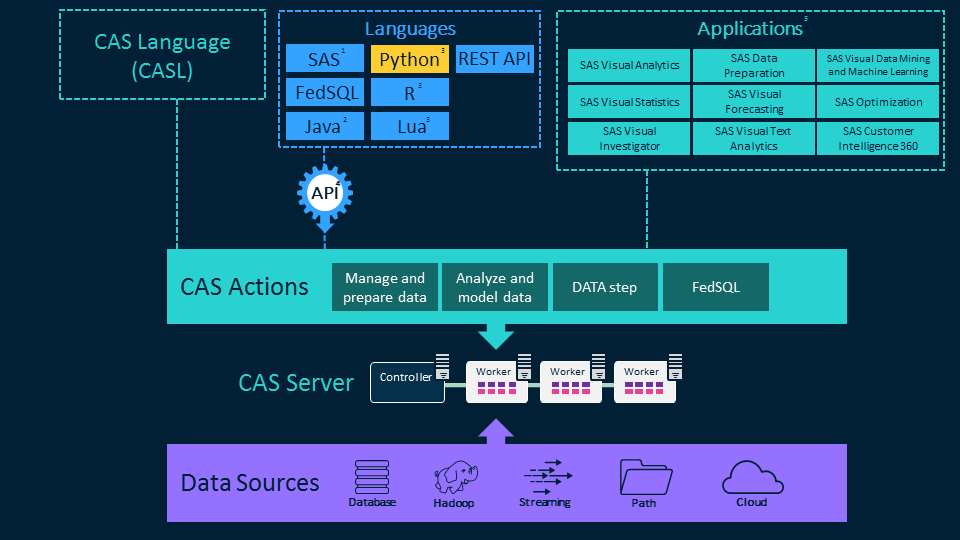

In [9]:
display_image('03_CAS_Overview4.png')

The CAS server needs to access data from some physical data source. CAS can access data from a variety of sources using [SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm), including databases, Hadoop, streaming data, path-based files, and data stored in the cloud.

Once data is loaded into memory on the CAS server, you can process that data using CAS actions. Actions are optimized units of work built for the distributed CAS server. CAS actions provide a range of functionality from managing, processing, analyzing, and modeling data, to executing most traditional SAS DATA step, FedSQL, and even DS2! 

CAS actions are organized into groups called CAS action sets, and the actions within a set perform related tasks. You can think of action sets as a package, and the actions within an action set as methods. 

For example, the table action set provides many actions for accessing and managing data.  These include the caslibInfo action to view available data sources, the tableInfo action to view available tables, the fileInfo action to list the data source files, and the fetch action to retrieve n rows of a table.

You request a specific action by specifying the action set name, a period, and the action name. Specifying the action set name is usually optional. However, there are a few actions with the same name in different action sets. In those cases, the action set name is required. In this course, we typically specify only the action.

CAS actions provide a variety of benefits.
- First, CAS actions are optimized to run in the CAS server's massively parallel processing engine for lightening-fast results.
- Second, the same CAS action is used regardless of programming language or application. That means you can use the same CAS action in CASL, Python, R, and more. This enables you to easily pass information between languages.
- When using actions in different languages, the results are equivalent (given seeds).
- Lastly, actions are multi-purpose. Actions perform a specific task, and within that task, an action can also perform a variety of other tasks like create a new table, create calculated columns, filter rows and columns, and group data.

The question is, how can you execute actions? 

SAS Viya provides a variety of interfaces for executing CAS actions. One way to execute actions on the CAS server is to use the native CAS language, or CASL for short. CASL supports executing CAS actions on the CAS server and uses normal programing logic. If you have experience using languages like Lua, Python, or R, CASL will be an easy language to learn.

Instead of using CASL, you can also execute CAS actions through the CAS API using traditional SAS programming, FedSQL, Java, Python, R, Lua, and REST API. This course focuses on using the Python language.

 Lastly, you can use a variety of SAS Viya applications like SAS Visual Analytics to create dashboards, SAS Visual Statistics and SAS Visual Data Mining and Machine Learning for modeling and statistics, and a variety of others. All applications execute actions behind the scenes.


NOTES:
1. With the SAS programming language, many PROCs and much of the traditional DATA step is CAS enabled and can be executed on CAS tables. For more information about how to execute traditional SAS code in SAS Viya, you can view the Programming for SAS Viya course: https://support.sas.com/edu/schedules.html?crs=PGVIYA&ctry=US.
2. For Java, you must use the CASClient class.
3. For Python, R, and Luna, the SWAT package is required. Many familiar methods are available through the SWAT package.
4. The CAS API converts the native language syntax to CAS actions behind the scenes.
5. Visit the SAS website for detailed information about all available SAS Viya offerings.

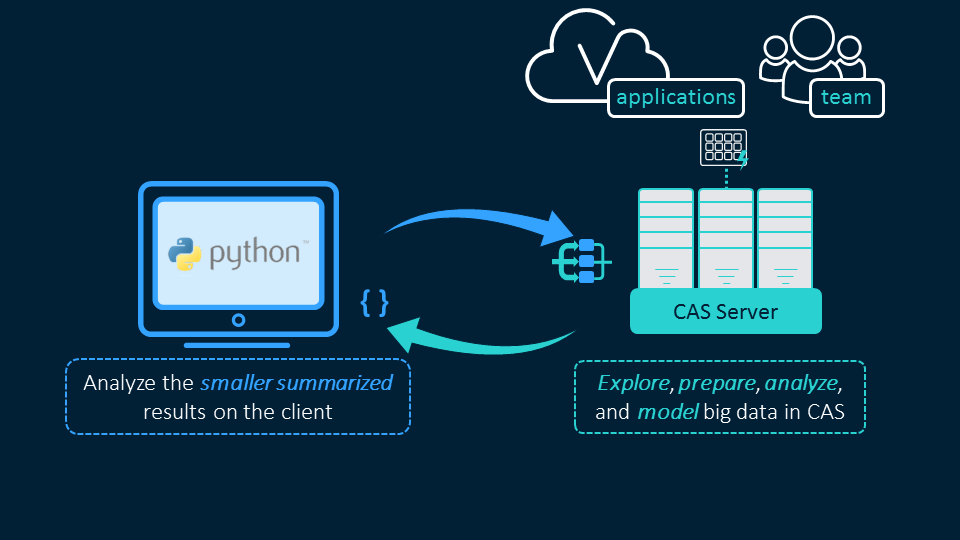

In [10]:
display_image('05_Client_Server.png')

You can use Python on your client to explore, prepare, analyze, and model big data on the CAS server using familiar Python syntax along with CAS actions to take advantage of the parallel processing power of CAS. If you are preparing data in CAS, you can then share that data with other users or other SAS Viya applications like SAS Visual Analytics to create shareable dashboards. 

If you are exploring, analyzing, or modeling data in CAS to take advantage of the in-memory parallel processing power,  CAS returns smaller summarized results back to your local Python client. Once the summarized results from the CAS server are returned to your client, you can use native Python packages on the smaller, more manageable data.


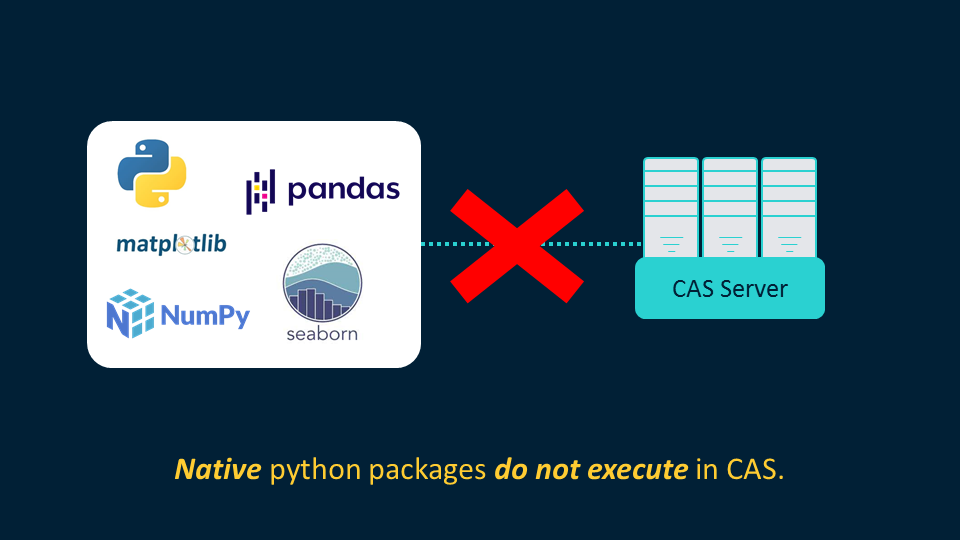

In [11]:
display_image('07_pandas.png')

As an experienced Python programmer, you most likely are familiar with Python packages like Pandas, Matplotlib, NumPy, and seaborn. You might be thinking, “Great, I can use these packages on data in CAS!” 

**False!**

Although these are great packages, they do not execute on data on the CAS server. I'll repeat this because it's very important and a common misconception.  Native Python packages do not execute on data on the CAS server.


### SWAT Package Overview
[SWAT Documentation](https://sassoftware.github.io/python-swat/getting-started.html)

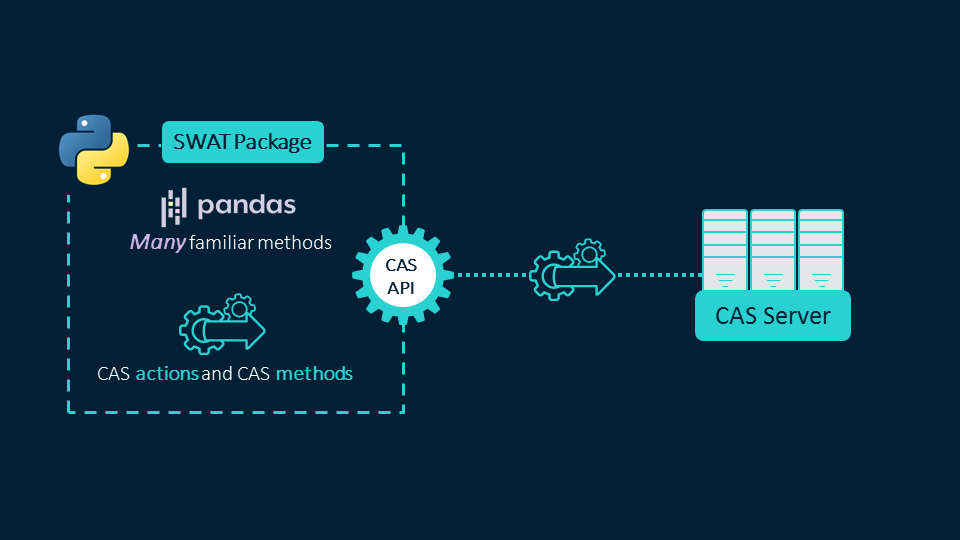

In [12]:
display_image('08a_swat.png')

In order to process data with Python on the CAS server, you must use the SAS Scripting Wrapper for Analytics Transfer, or the SWAT package for short. This is an open-source package used with Python, R, and Lua. With the SWAT package, you can write a program that connects to the CAS server, quickly load large amounts of data into memory, analyze the data, and then work with the results of your analysis using familiar techniques in the open-source language of your choice.

The Python SWAT package contains many familiar Pandas methods, functions, and attributes that work like their counterparts. However, not all methods and functions are available, so be sure to download the latest version of the SWAT package for the most up-to-date functionality.

The SWAT package also contains an enormous number of CAS actions and CAS methods that can be used to process your data.

For example, with the SWAT package, you can use the familiar head method from the Pandas API on a CAS table to return the first n rows of a CAS table.

In all cases, the code is translated through the CAS API into the same fetch CAS action behind the scenes and sent to the CAS server. The action is processed in CAS, and the results are sent from the CAS server to the client.The CAS API converts familiar Pandas methods into actions behind the scenes, but you can also execute actions directly through the SWAT package.

In this example, you can execute the same fetch CAS action in Python. The action is sent to the CAS server, and CAS processes the action and returns the results to the client. The same action can be used in all languages that work with CAS.

The CAS API converts familiar Pandas methods into actions behind the scenes, but you can also execute actions directly through the SWAT package.

In this example, you can execute the same fetch CAS action in Python. The action is sent to the CAS server, and CAS processes the action and returns the results to the client. The same action can be used in all languages that work with CAS.

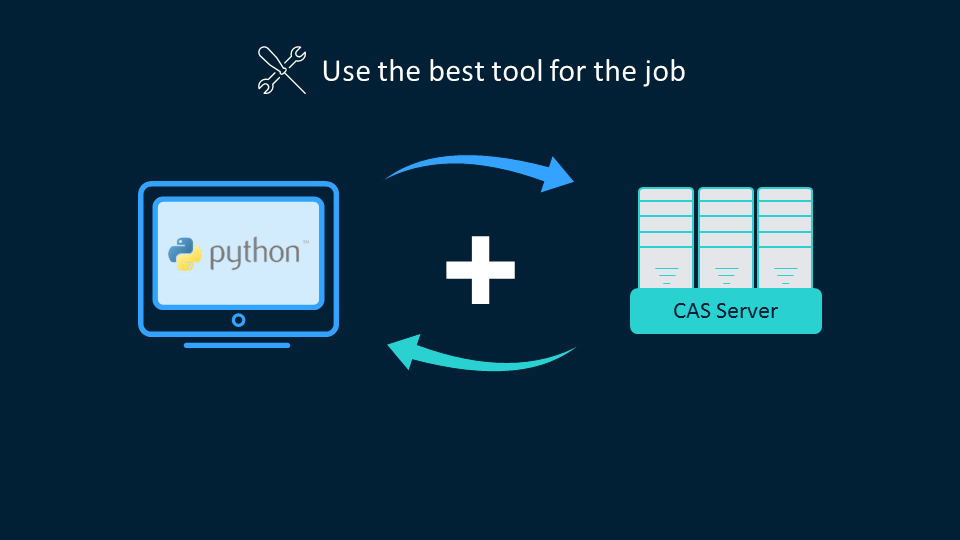

In [13]:
display_image('09_client_server.png')

In the end, having both your Python client and the CAS server offers you a lot of flexibility. The goal is to look at each as a tool and determine the best tool for the job.

# Accessing, exploring and preparing distributed data using the Python SWAT Package

## 1. Setup

### a. Import packages

In [14]:
## System packages
import sys
import os

## Data packages
import swat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Set pandas column options
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_columns', None)

## My custom personal module to connect to my CAS environment
try:
    from casConnect import connect_to_cas 
except:
    print('casConnect package not available')

## Check Python and package versions
print(f'Python version:{sys.version.split(" ")[0]}')
print(f'numpy:{np.__version__}')
print(f'pandas:{pd.__version__}')
print(f'swat:{swat.__version__}')

Python version:3.8.16
numpy:1.24.3
pandas:1.4.4
swat:1.13.0


### b. Connect to the CAS server

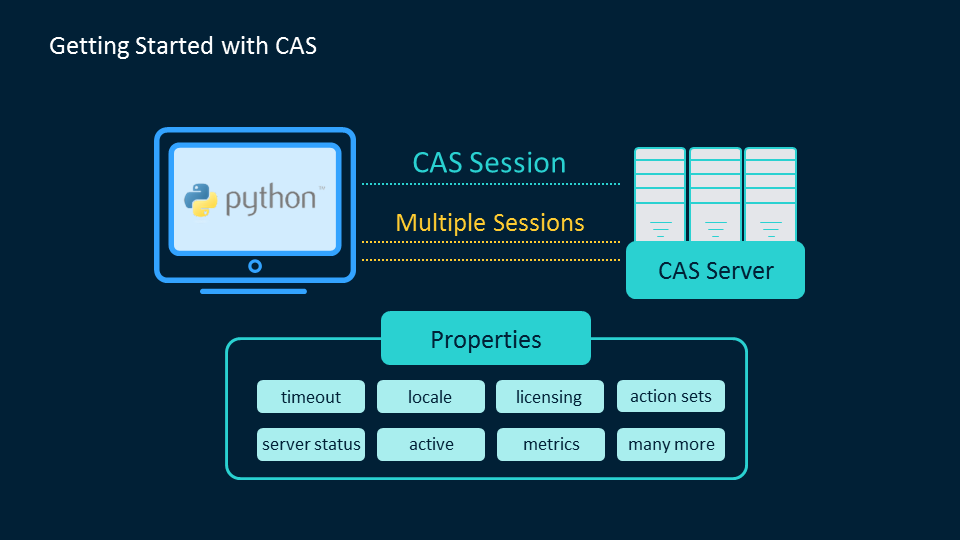

In [15]:
display_image('10_CAS_session.png')

To begin working with CAS, you need to make a connection to the CAS server. This is known as a CAS session. A CAS session contains a variety of information and properties. These include server status and licensing, as well as session properties like timeout, locale, active caslib, metrics, and more. 

You can also create multiple CAS sessions on the CAS server, and these CAS sessions are independent of each other. One reason you would want to create multiple CAS sessions is to execute programs in parallel. One example would be if you want to execute three different machine learning models at the same time. Otherwise, if you do not terminate your connection to CAS, you might mistakenly create multiple connections to CAS, consuming resources.


To connect to the CAS server, you need:
- the host name, 
- the port number, 
- authentication

**Be aware that connecting to the CAS server can be implemented in various ways, so you might need to see your system administrator about how to make a connection. Please follow company policy regarding authentication.**

In [16]:
###################################################################################
## General syntax
###################################################################################
## conn = swat.CAS('server.demo.sas.com', port number, 'username', 'password')
###################################################################################


###################################################################################
## Viya for Learners 3.5 CAS connection information
###################################################################################
# hostValue = os.environ.get('CASHOST')
# portValue = os.environ.get('CASPORT')
# passwordToken=os.environ.get('SAS_VIYA_TOKEN')
# conn = swat.CAS(hostname=hostValue,port=portValue,password=passwordToken)
###################################################################################

#### REQUIRED: Modify the connection information below to connect to your CAS server

This connection uses a demo environment and my personal connection to CAS. You will have to modify this to connect to your CAS server.

In [17]:
conn = connect_to_cas()

In [18]:
type(conn)

swat.cas.connection.CAS

Confirm the connection is working and view the version of SAS Viya.

In [19]:
try:
    print(conn.about()['About']['Viya Version'])  ## Current SAS Viya versions
except:
    print(conn.about()['About']['Version'])       ## If you are using SAS Viya 3.5 or prior

NOTE: Grid node action status report: 5 nodes, 9 total actions executed.
Stable 2023.04


### c. <a id='setup'>Set up demonstration data</a>
The following script will create a parquet file for the demonstration. We are using small, familiar data for training purposes. Typically the CAS server is used for larger data and resource intensive ML. 

The script will:
1. Download the **home_equity.csv** file from the **Example Data Sets for the SAS® Viya® Platform** webpage and load it to the CAS server as the CAS table **home_equity_raw**.
2. Save the CAS table as the file **home_equity_raw.parquet** in the Casuser caslib.
3. Drop the **home_equity_raw** in-memory CAS table.

In [20]:
## Download the CSV file from the SAS Viya Examples Data Sets website and load it to CAS
uploadFile = "https://support.sas.com/documentation/onlinedoc/viya/exampledatasets/home_equity.csv"

## Load the data to CAS
castbl = conn.read_csv(uploadFile,
                       casout = {'name':'home_equity_raw', 
                                 'caslib':'casuser',
                                 'replace':True}
                      )

## Save the CAS table as a parquet file in the Casuser caslib
castbl.save(name='home_equity_raw.parquet', caslib='casuser', replace = True)

## Drop the CAS table
castbl.dropTable()

NOTE: Cloud Analytic Services made the uploaded file available as table HOME_EQUITY_RAW in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: The table HOME_EQUITY_RAW has been created in caslib CASUSER(Peter.Styliadis@sas.com) from binary data uploaded to Cloud Analytic Services.
NOTE: Cloud Analytic Services saved the file home_equity_raw.parquet in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services dropped table HOME_EQUITY_RAW from caslib CASUSER(Peter.Styliadis@sas.com).


+ Elapsed: 0.00898s, user: 0.0028s, sys: 0.0174s, mem: 1.39mb

## 2. Explore available data in the CAS server

[SAS Viya Data Connectors](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casref/p0j09xx6p9ffven1x7z9cq8s1zaa.htm) enable you to connect to a variety of data sources throughout your organization like Amazone Redshift, SQL Server, Postgres, Salesforce, Snowflake, Spark and more.

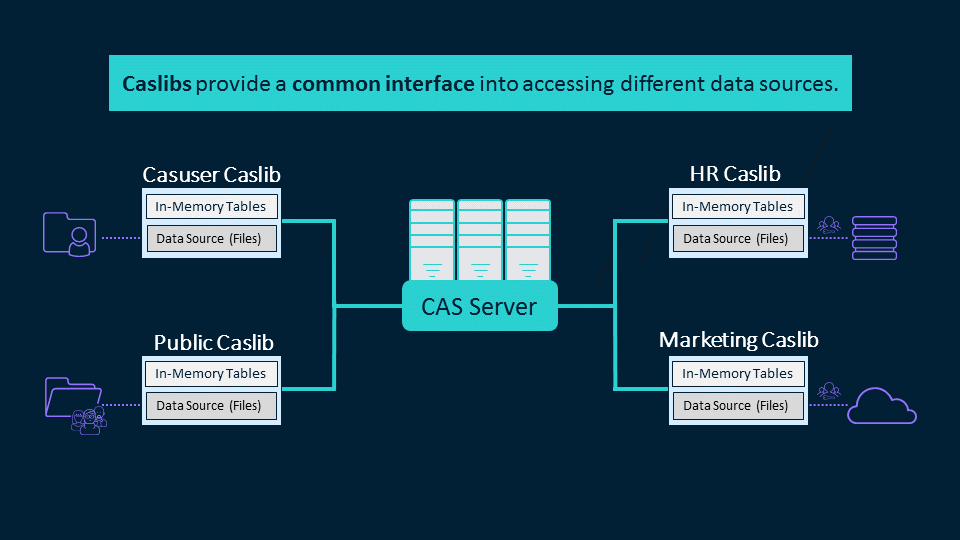

In [21]:
display_image('11a_caslibs.png')

CAS stores and accesses data via caslibs. Caslibs provide a common interface into accessing different data sources. No matter which data source you access in CAS, it is connected via a caslib. Caslibs connect into a variety of data sources in your organization.

A caslib consists of three main parts. 

First, there’s the data source portion. The data source portion contains connection information to a physical data source for storage. Data might be stored on disk in a path with familiar formats such as SAS data sets, CSV, Microsoft Excel, or parquet files, or stored in databases, the cloud, Hadoop, or other systems. The data source portion stores the connection and authorization information required for interacting with those files using SAS Viya data connectors. Data stored in the data source portion of a caslib is generally referred to as files. Files in the data source area cannot be processed directly. 

The second part of a caslib is the in-memory portion. The in-memory portion provides a space to hold tables that can have operations performed on them. You can almost think of a CAS table as a DataFrame on the CAS server. A file must first be loaded into memory from a data source. Data loaded into memory is generally referred to as tables or CAS tables. >When they are loaded, in-memory tables are available for processing, and they persist in memory. Because there's no connection between the in-memory copy and the data source file, if you want to permanently keep changes made to the data during processing, the in-memory table should be explicitly written back to the data source. If you are done with the CAS table, you can drop the table. We discuss this more later.

Lastly, a caslib contains access controls about who can access that specific caslib.

### a. View available caslibs (data sources) in the CAS server

In [22]:
conn.caslibInfo()

[CASLibInfo]

                                 Name  Type                                                                               Description                                                         Path Definition  Subdirs  Local  Active  Personal  Hidden  Transient
 0   CASUSER(Peter.Styliadis@sas.com)  PATH                                                               Personal File System Caslib  /cas/data/caslibs/casuserlibraries/peter.styliadis@sas.com/                 1.0    0.0     1.0       1.0     0.0        1.0
 1                            cpgretl  PATH                                                                                                                           /cas/data/caslibs/cpgretail/                 1.0    0.0     0.0       0.0     0.0        0.0
 2                         CPSAppData  PATH                                                                                                                          /cas/data/caslibs/CPSAppData/                 0.0    0.0     0.0       0.0     0.0        0.0
 3                             EDUPub  PATH                                                                                                                              /cas/data/caslibs/edupub/                 0.0    0.0     0.0       0.0     0.0        0.0
 4                EP_CommunityCollege  PATH                                                                                               /cas/data/caslibs/educationpractice/EP_CommunityCollege/                 0.0    0.0     0.0       0.0     0.0        0.0
 5                             EP_DOE  PATH                                                                                                            /cas/data/caslibs/educationpractice/EP_DOE/                 0.0    0.0     0.0       0.0     0.0        0.0
 6                     EP_Forecasting  PATH                                                                                                    /cas/data/caslibs/educationpractice/EP_Forecasting/                 0.0    0.0     0.0       0.0     0.0        0.0
 7                             EP_K12  PATH                                                                                                            /cas/data/caslibs/educationpractice/EP_K12/                 0.0    0.0     0.0       0.0     0.0        0.0
 8                            EP_SAfE  PATH                                                                                                           /cas/data/caslibs/educationpractice/EP_SAfE/                 0.0    0.0     0.0       0.0     0.0        0.0
 9                          EP_Shapes  PATH                                                                                                         /cas/data/caslibs/educationpractice/EP_Shapes/                 0.0    0.0     0.0       0.0     0.0        0.0
 10                         EP_Sports  PATH                                                                                                         /cas/data/caslibs/educationpractice/EP_Sports/                 0.0    0.0     0.0       0.0     0.0        0.0
 11                     EP_University  PATH                                                                                                     /cas/data/caslibs/educationpractice/EP_University/                 0.0    0.0     0.0       0.0     0.0        0.0
 12                      EP_Workforce  PATH                                                                                                      /cas/data/caslibs/educationpractice/EP_Workforce/                 0.0    0.0     0.0       0.0     0.0        0.0
 13                           Formats  PATH                                                              Stores user defined formats.                                   /cas/data/caslibs/formats/                 0.0    0.0     0.0       0.0     0.0        0.0
 14                              GPCI  PATH                         Group Lib for Global CI team.   S

### b. View available data source files in a caslib

[table.fileInfo CAS action](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-fileinfo.htm)

In [23]:
conn.fileInfo(caslib = 'casuser')

[FileInfo]

     Permission Owner Group                           Name       Size Encryption                       Time       ModTime
 0   -rwxr-xr-x   sas   sas                  cars.sas7bdat     139264             2023-02-23T14:21:31+00:00  1.992781e+09
 1   -rwxr-xr-x   sas   sas         previoussales.sas7bdat      73728             2023-04-26T20:22:48+00:00  1.998160e+09
 2   -rwxr-xr-x   sas   sas                    VTI.sashdat     413080       NONE  2022-10-11T13:40:38+00:00  1.981115e+09
 3   -rwxr-xr-x   sas   sas                   hmeq.sashdat     630384       NONE  2022-10-13T17:56:59+00:00  1.981303e+09
 4   -rwxr-xr-x   sas   sas             tsa_claims_raw.csv   34936205             2023-01-16T13:13:53+00:00  1.989494e+09
 5   -rwxr-xr-x   sas   sas              warranty_demo.csv   53297896             2023-03-02T12:05:27+00:00  1.993378e+09
 6   -rwxr-xr-x   sas   sas         warranty_final.sashdat   68666080       NONE  2023-05-09T18:16:05+00:00  1.999275e+09
 7   -rwxr-xr-x   sas   sas                   cars.parquet       4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 8   -rwxr-xr-x   sas   sas               warranty.sashdat  104227048       NONE  2023-04-05T20:51:09+00:00  1.996347e+09
 9   -rwxr-xr-x   sas   sas  warranty.sashdatxfdas.sashdat  104227048       NONE  2023-04-05T20:42:54+00:00  1.996347e+09
 10  -rwxr-xr-x   sas   sas                   cars.sashdat     102936       NONE  2023-05-09T18:03:20+00:00  1.999275e+09
 11  -rwxr-xr-x   sas   sas                       cars.csv      34289             2023-05-09T18:03:20+00:00  1.999275e+09
 12  -rwxr-xr-x   sas   sas                       cars.txt      34289             2023-05-09T18:03:20+00:00  1.999275e+09
 13  -rwxr-xr-x   sas   sas                 ordersDemo.csv     696446             2023-01-18T00:35:57+00:00  1.989621e+09
 14  -rwxr-xr-x   sas   sas          previousSales.sashdat       8416       NONE  2023-04-26T20:22:07+00:00  1.998160e+09
 15  -rwxr-xr-x   sas   sas                   products.csv     492125             2023-01-18T12:49:50+00:00  1.989665e+09
 16  -rwxr-xr-x   sas   sas           discount_dim.sashdat     237952       NONE  2023-01-18T12:49:51+00:00  1.989665e+09
 17  -rwxr-xr-x   sas   sas                      heart.csv     458623             2023-01-20T20:41:13+00:00  1.989866e+09
 18  -rwxr-xr-x   sas   sas                  heart_raw.csv     458623             2023-01-20T20:43:00+00:00  1.989867e+09
 19  -rwxr-xr-x   sas   sas           currentSales.sashdat       8416       NONE  2023-04-26T20:22:48+00:00  1.998160e+09
 20  -rwxr-xr-x   sas   sas             warranty_final.csv   39528995             2023-05-09T18:16:03+00:00  1.999275e+09
 21  -rwxr-xr-x   sas   sas         warranty_final.parquet       4096       NONE  2023-05-09T18:16:04+00:00  1.999275e+09
 22  drwxr-xr-x   sas   sas                 csv_file_blogs       4096             2023-05-12T12:51:01+00:00  1.999515e+09
 23  -rwxr-xr-x   sas   sas        home_equity_raw.parquet       4096       NONE  2023-05-18T13:13:58+00:00  2.000035e+09
 24  -rwxr-xr-x   sas   sas              loans_raw.sashdat   13821560       NONE  2023-02-23T14:21:28+00:00  1.992781e+09
 25  -rwxr-xr-x   sas   sas              customers_raw.csv    3101649             2023-02-23T14:21:30+00:00  1.992781e+09
 26  -rwxr-xr-x   sas   sas             appRatings.sashdat    3954240       NONE  2023-02-23T14:21:30+00:00  1.992781e+09
 27  -rwxr-xr-x   sas   sas                  heart.sashdat    1020320       NONE  2023-02-23T14:21:31+00:00  1.992781e+09

+ Elapsed: 0.0477s, user: 0.015s, sys: 0.0114s, mem: 1.81mb

In [24]:
conn.fileInfo(caslib = 'samples')

[FileInfo]

    Permission Owner Group                                     Name      Size Encryption                       Time       ModTime
 0  -rwxr-xr-x   sas   sas                       COSTCHANGE.sashdat      9776       NONE  2021-12-18T18:35:03+00:00  1.955472e+09
 1  -rwxr-xr-x   sas   sas  PROMO_EFFECTIVENESS_X_EFFECTS_2.sashdat      9312       NONE  2021-12-18T18:35:03+00:00  1.955472e+09
 2  -rwxr-xr-x   sas   sas                  RAND_RETAILDEMO.sashdat  42612664       NONE  2021-12-18T18:35:04+00:00  1.955472e+09
 3  -rwxr-xr-x   sas   sas   SW_LAKE_RT_SENSOR_WATERQUALITY.sashdat    301312       NONE  2021-12-18T18:35:04+00:00  1.955472e+09
 4  -rwxr-xr-x   sas   sas             WARRANTY_CLAIMS_0117.sashdat  13563272       NONE  2021-12-18T18:35:04+00:00  1.955472e+09
 5  -rwxr-xr-x   sas   sas                    WATER_CLUSTER.sashdat    773208       NONE  2021-12-18T18:35:04+00:00  1.955472e+09
 6  -rwxr-xr-x   sas   sas                  predef_svrtdist.sashdat     78872       NONE  2023-04-07T09:31:18+00:00  1.996479e+09

+ Elapsed: 0.0373s, user: 0.00916s, sys: 0.0134s, mem: 1.81mb

### c. View available in-memory CAS tables in a caslib
[table.tableInfo CAS action](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-tableinfo.htm)

In [25]:
conn.tableInfo(caslib = 'casuser')

NOTE: No tables are available in caslib CASUSER(Peter.Styliadis@sas.com) of Cloud Analytic Services.


+ Elapsed: 0.00805s, user: 0.0056s, sys: 0.012s, mem: 1.44mb

### d. Load a file into memory on the CAS server

Confirm the **home_equity_raw.parquet** file exits in the Casuser caslib. If it does not, run the code in the [Set up demonstration data](#setup) section.

In [26]:
conn.fileInfo(caslib = 'casuser')

[FileInfo]

     Permission Owner Group                           Name       Size Encryption                       Time       ModTime
 0   -rwxr-xr-x   sas   sas                  cars.sas7bdat     139264             2023-02-23T14:21:31+00:00  1.992781e+09
 1   -rwxr-xr-x   sas   sas         previoussales.sas7bdat      73728             2023-04-26T20:22:48+00:00  1.998160e+09
 2   -rwxr-xr-x   sas   sas                    VTI.sashdat     413080       NONE  2022-10-11T13:40:38+00:00  1.981115e+09
 3   -rwxr-xr-x   sas   sas                   hmeq.sashdat     630384       NONE  2022-10-13T17:56:59+00:00  1.981303e+09
 4   -rwxr-xr-x   sas   sas             tsa_claims_raw.csv   34936205             2023-01-16T13:13:53+00:00  1.989494e+09
 5   -rwxr-xr-x   sas   sas              warranty_demo.csv   53297896             2023-03-02T12:05:27+00:00  1.993378e+09
 6   -rwxr-xr-x   sas   sas         warranty_final.sashdat   68666080       NONE  2023-05-09T18:16:05+00:00  1.999275e+09
 7   -rwxr-xr-x   sas   sas                   cars.parquet       4096       NONE  2022-11-17T14:19:19+00:00  1.984314e+09
 8   -rwxr-xr-x   sas   sas               warranty.sashdat  104227048       NONE  2023-04-05T20:51:09+00:00  1.996347e+09
 9   -rwxr-xr-x   sas   sas  warranty.sashdatxfdas.sashdat  104227048       NONE  2023-04-05T20:42:54+00:00  1.996347e+09
 10  -rwxr-xr-x   sas   sas                   cars.sashdat     102936       NONE  2023-05-09T18:03:20+00:00  1.999275e+09
 11  -rwxr-xr-x   sas   sas                       cars.csv      34289             2023-05-09T18:03:20+00:00  1.999275e+09
 12  -rwxr-xr-x   sas   sas                       cars.txt      34289             2023-05-09T18:03:20+00:00  1.999275e+09
 13  -rwxr-xr-x   sas   sas                 ordersDemo.csv     696446             2023-01-18T00:35:57+00:00  1.989621e+09
 14  -rwxr-xr-x   sas   sas          previousSales.sashdat       8416       NONE  2023-04-26T20:22:07+00:00  1.998160e+09
 15  -rwxr-xr-x   sas   sas                   products.csv     492125             2023-01-18T12:49:50+00:00  1.989665e+09
 16  -rwxr-xr-x   sas   sas           discount_dim.sashdat     237952       NONE  2023-01-18T12:49:51+00:00  1.989665e+09
 17  -rwxr-xr-x   sas   sas                      heart.csv     458623             2023-01-20T20:41:13+00:00  1.989866e+09
 18  -rwxr-xr-x   sas   sas                  heart_raw.csv     458623             2023-01-20T20:43:00+00:00  1.989867e+09
 19  -rwxr-xr-x   sas   sas           currentSales.sashdat       8416       NONE  2023-04-26T20:22:48+00:00  1.998160e+09
 20  -rwxr-xr-x   sas   sas             warranty_final.csv   39528995             2023-05-09T18:16:03+00:00  1.999275e+09
 21  -rwxr-xr-x   sas   sas         warranty_final.parquet       4096       NONE  2023-05-09T18:16:04+00:00  1.999275e+09
 22  drwxr-xr-x   sas   sas                 csv_file_blogs       4096             2023-05-12T12:51:01+00:00  1.999515e+09
 23  -rwxr-xr-x   sas   sas        home_equity_raw.parquet       4096       NONE  2023-05-18T13:13:58+00:00  2.000035e+09
 24  -rwxr-xr-x   sas   sas              loans_raw.sashdat   13821560       NONE  2023-02-23T14:21:28+00:00  1.992781e+09
 25  -rwxr-xr-x   sas   sas              customers_raw.csv    3101649             2023-02-23T14:21:30+00:00  1.992781e+09
 26  -rwxr-xr-x   sas   sas             appRatings.sashdat    3954240       NONE  2023-02-23T14:21:30+00:00  1.992781e+09
 27  -rwxr-xr-x   sas   sas                  heart.sashdat    1020320       NONE  2023-02-23T14:21:31+00:00  1.992781e+09

+ Elapsed: 0.0482s, user: 0.00649s, sys: 0.0224s, mem: 1.81mb

Use the [table.loadTable action](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-loadtable.htm) to load the **home_equity_raw.parquet** data source file into memory. This is similar to loading a file as a DataFrame in pandas using a read_csv method.

In [27]:
conn.loadTable(path = 'home_equity_raw.parquet', caslib = 'casuser',    ## File to load into memory. Similar to a pandas read_ method
               casout = {                                               ## Output CAS in-memory table information
                   'name':'home_equity_raw',
                   'caslib':'casuser',
                   'replace':True
               })

NOTE: Cloud Analytic Services made the file home_equity_raw.parquet available as table HOME_EQUITY_RAW in caslib CASUSER(Peter.Styliadis@sas.com).


[caslib]

 'CASUSER(Peter.Styliadis@sas.com)'

[tableName]

 'HOME_EQUITY_RAW'

[casTable]

 CASTable('HOME_EQUITY_RAW', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.0742s, user: 0.0901s, sys: 0.141s, mem: 410mb

View the available in-memory tables on the CAS server. The **HOME_EQUITY_RAW** CAS table is now in-memory on the CAS server.

In [28]:
conn.tableInfo(caslib = 'casuser')

[TableInfo]

               Name  Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart               SourceName                      SourceCaslib  Compressed                  Creator Modifier SourceModTimeFormatted  SourceModTime
 0  HOME_EQUITY_RAW  5960       18               0    utf-8  2023-05-18T13:13:59+00:00  2023-05-18T13:13:59+00:00  2023-05-18T13:13:59+00:00        UTF8  2.000035e+09  2.000035e+09  2.000035e+09       0         0     0          0  home_equity_raw.parquet  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com                                            NaN

+ Elapsed: 0.00887s, user: 0.00896s, sys: 0.00987s, mem: 1.84mb

## 3. Exploratory data analysis
Use the the pandas API and CAS actions from the SWAT package to explore a CAS table.

### a. Create a client-side reference to the CAS table

Reference the CAS table.

In [29]:
rawTbl = conn.CASTable('home_equity_raw', caslib = 'casuser')

View the value of castbl. Notice that it's simply a reference to a distributed CAS table.

In [30]:
rawTbl

CASTable('home_equity_raw', caslib='casuser')

View the object type.

In [31]:
type(rawTbl)

swat.cas.table.CASTable

**CASTable object**

CASTable objects and DataFrame objects (either pandas.DataFrame or SASDataFrame) act very similar in many ways, but they are extremely different constructs. CASTable objects do not contain actual data. They are simply a client-side view of the data in a CAS table on a CAS server. DataFrames and SASDataFrames contain data in-memory on the client machine.

### b. Explore the CAS table

View the number of rows and columns in the CAS table.

In [32]:
rawTbl.shape

(5960, 18)

View details about the CAS table using the [table.tableDetails CAS action](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-tabledetails.htm).

In [33]:
rawTbl.tableDetails()

[TableDetails]

   Node  Blocks  Active  Rows  IndexSize  DataSize  VardataSize  CompressedSize  CompressionRatio  Mapped  MappedMemory  Unmapped  UnmappedMemory  Allocated  AllocatedMemory  DeletedRows TableLocation
 0  ALL       8       4  5960          0   1435848       291528               0                 0       4       1436560         4         1436560          0                0            0           CAS

+ Elapsed: 0.0119s, user: 0.00539s, sys: 0.019s, mem: 1.8mb

Run the head method on the CASTable object and store the results of the head method on the client. Notice that it's a SASDataFrame object. A SASDataFrame is simply a subclass to a pandas DataFrame.

In [34]:
df = rawTbl.head()
type(df)

swat.dataframe.SASDataFrame

**SASDataFrame object**

The SASDataFrame object is a subclass of pandas.DataFrame and local on the client. SASDataFames have some additional attributes to hold SAS metadata such as titles, labels, column metadata, etc. It also adds a few utility methods for handling By group representations.

View column attributes of the CAS table using the [table.columnInfo](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-columninfo.htm) CAS action.

In [35]:
rawTbl.columnInfo()

[ColumnInfo]

       Column Label  ID     Type  RawLength  FormattedLength Format  NFL  NFD
 0        BAD         1   double          8               12   BEST   12    0
 1       LOAN         2   double          8               12   BEST   12    0
 2    MORTDUE         3   double          8               12   BEST   12    0
 3      VALUE         4   double          8               12   BEST   12    0
 4     REASON         5  varchar          7                7      $    7    0
 5        JOB         6  varchar          7                7      $    7    0
 6        YOJ         7   double          8               12   BEST   12    0
 7      DEROG         8   double          8               12   BEST   12    0
 8     DELINQ         9   double          8               12   BEST   12    0
 9      CLAGE        10   double          8               12   BEST   12    0
 10      NINQ        11   double          8               12   BEST   12    0
 11      CLNO        12   double          8               12   BEST   12    0
 12   DEBTINC        13   double          8               12   BEST   12    0
 13   APPDATE        14   double          8               12   BEST   12    0
 14      CITY        15  varchar         19               19      $   19    0
 15     STATE        16  varchar         20               20      $   20    0
 16  DIVISION        17  varchar         18               18      $   18    0
 17    REGION        18  varchar          9                9      $    9    0

+ Elapsed: 0.0104s, user: 0.0155s, sys: 0.00837s, mem: 2.48mb

Store the results of a CAS action. All CAS actions return CASResults objects. These are simply python dictionaries on the client-side. They contain some additional methods and attributes.

In [36]:
cr = rawTbl.columnInfo()
type(cr)

swat.cas.results.CASResults

**CASResults object**

The output of all CAS actions is a CASResults object. This is a Python ordered dictionary with a few methods added to assist in handling the output keys, and attributes added to report information from the CAS action.

In [37]:
cr.keys()

odict_keys(['ColumnInfo'])

### c. SWAT package common objects overview

[CASTable vs. DataFrame vs. SASDataFrame](https://sassoftware.github.io/python-swat/table-vs-dataframe.html#castable-vs-dataframe-vs-sasdataframe)

[Handling the output](https://sassoftware.github.io/python-swat/getting-started.html#handling-the-output)

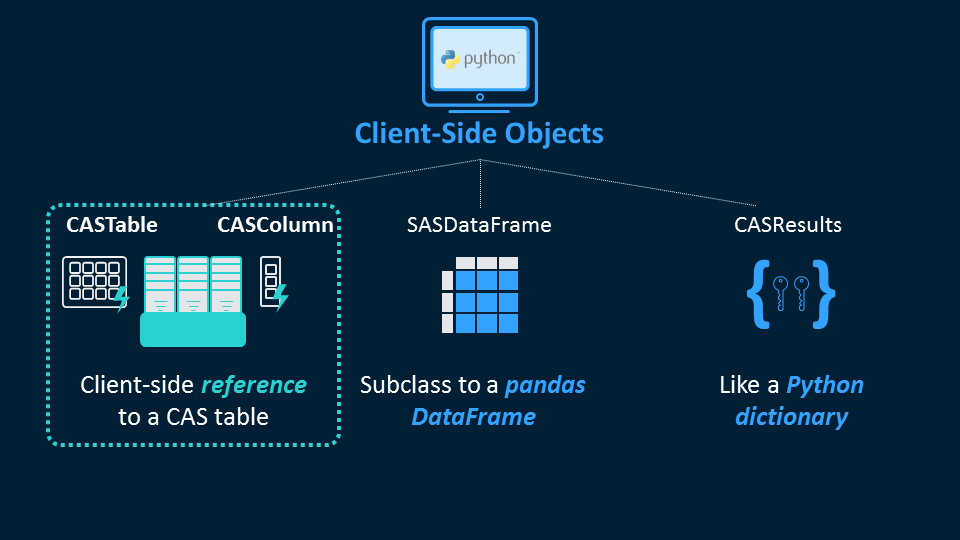

In [38]:
display_image('12b_swat_objects.png')

After using a SWAT method or CAS action, the results are returned to the client. Let's investigate a few of the common client-side objects a bit further.

**CASTable or CASColumn**

First, if you see a CASTable or CASColumn object, those are simply client-side references to an in-memory table on the CAS server. The physical table is not stored on your client machine. You can think of these objects as simply pointing to a table in CAS. To process a CAS table, you must execute a method or action on the object. The CASTable object is the most important object in the SWAT package other than the CAS connection object.

**SASDataFrame**

Another common object that you will see is a SASDataFrame. A SASDataFrame object is a subclass to a pandas.DataFrame. For the most part, you don’t need to worry about the difference between a SASDataFrame and a panda.DataFrame. They work the same way. The only difference is that a SASDataFrame contains extra attributes to store the SAS metadata such as title, label, and name. If you see a SASDataFrame object, that data lives on your client.

**CASResults**

Lastly, there is the CASResults object. This is simply a Python dictionary with additional attributes. You can simply work with the CASResults object as you would a Python dictionary. If you see a CASResults object, that data lives on your client.


### d. Find the number of distinct and missing values

Find the number of distinct and missing values in a CAS table.

In [39]:
rawTbl.BAD.nunique()

2

In [40]:
rawTbl.REASON.unique()

array(['', 'DebtCon', 'HomeImp'], dtype=object)

In [41]:
rawTbl.nmiss()

BAD            0
LOAN           0
MORTDUE      518
VALUE        112
REASON       252
JOB          279
YOJ          515
DEROG        708
DELINQ       580
CLAGE        308
NINQ         510
CLNO         222
DEBTINC     1267
APPDATE        0
CITY          12
STATE          0
DIVISION       0
REGION         0
dtype: int64

Use the [simple.distinct](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casanpg/cas-simple-distinct.htm) CAS action to compute the number of distinct and missing values of each column in a CAS table. Call the dictionary key to access the SASDataFrame, and store the results in the variable distinct_df. Notice that distinct_df is a SASDataFrame and is local on the client.

In [42]:
distinct_df = rawTbl.distinct()['Distinct']

display(type(distinct_df), distinct_df)

swat.dataframe.SASDataFrame

Distinct Counts for HOME_EQUITY_RAW

      Column  NDistinct   NMiss  Trunc
0        BAD        2.0     0.0    0.0
1       LOAN      540.0     0.0    0.0
2    MORTDUE     5054.0   518.0    0.0
3      VALUE     5382.0   112.0    0.0
4     REASON        3.0   252.0    0.0
5        JOB        7.0   279.0    0.0
6        YOJ      100.0   515.0    0.0
7      DEROG       12.0   708.0    0.0
8     DELINQ       15.0   580.0    0.0
9      CLAGE     5315.0   308.0    0.0
10      NINQ       17.0   510.0    0.0
11      CLNO       63.0   222.0    0.0
12   DEBTINC     4694.0  1267.0    0.0
13   APPDATE     1755.0     0.0    0.0
14      CITY      858.0    12.0    0.0
15     STATE       51.0     0.0    0.0
16  DIVISION        9.0     0.0    0.0
17    REGION        4.0     0.0    0.0

A SASDataFrame is a subclass of pandas DataFrame. Therefore, anything you can do with a pandas DataFrame will also work with SASDataFrame. SASDataFrames are local on the client.

Create the **pctDistinct** and **pctMissing** columns using traditional pandas code. All work on a SASDataFrame is done on the client. 

In [43]:
## Get the total number of rows from the CAS table
totalRows = rawTbl.shape[0]

## Calculate a new column in the DataFrame with the percentage of missing values by column using pandas
distinct_df = (distinct_df
               .assign(pctMissing = distinct_df.NMiss / totalRows,
                       pctDistinct = distinct_df.NDistinct / totalRows
                      )
               .sort_values('pctMissing', ascending = False)
)

distinct_df

Distinct Counts for HOME_EQUITY_RAW

      Column  NDistinct   NMiss  Trunc  pctMissing  pctDistinct
12   DEBTINC     4694.0  1267.0    0.0    0.212584     0.787584
7      DEROG       12.0   708.0    0.0    0.118792     0.002013
8     DELINQ       15.0   580.0    0.0    0.097315     0.002517
2    MORTDUE     5054.0   518.0    0.0    0.086913     0.847987
6        YOJ      100.0   515.0    0.0    0.086409     0.016779
10      NINQ       17.0   510.0    0.0    0.085570     0.002852
9      CLAGE     5315.0   308.0    0.0    0.051678     0.891779
5        JOB        7.0   279.0    0.0    0.046812     0.001174
4     REASON        3.0   252.0    0.0    0.042282     0.000503
11      CLNO       63.0   222.0    0.0    0.037248     0.010570
3      VALUE     5382.0   112.0    0.0    0.018792     0.903020
14      CITY      858.0    12.0    0.0    0.002013     0.143960
16  DIVISION        9.0     0.0    0.0    0.000000     0.001510
15     STATE       51.0     0.0    0.0    0.000000     0.008557
0        BAD        2.0     0.0    0.0    0.000000     0.000336
13   APPDATE     1755.0     0.0    0.0    0.000000     0.294463
1       LOAN      540.0     0.0    0.0    0.000000     0.090604
17    REGION        4.0     0.0    0.0    0.000000     0.000671

Plot the DataFrame on the Python client using pandas

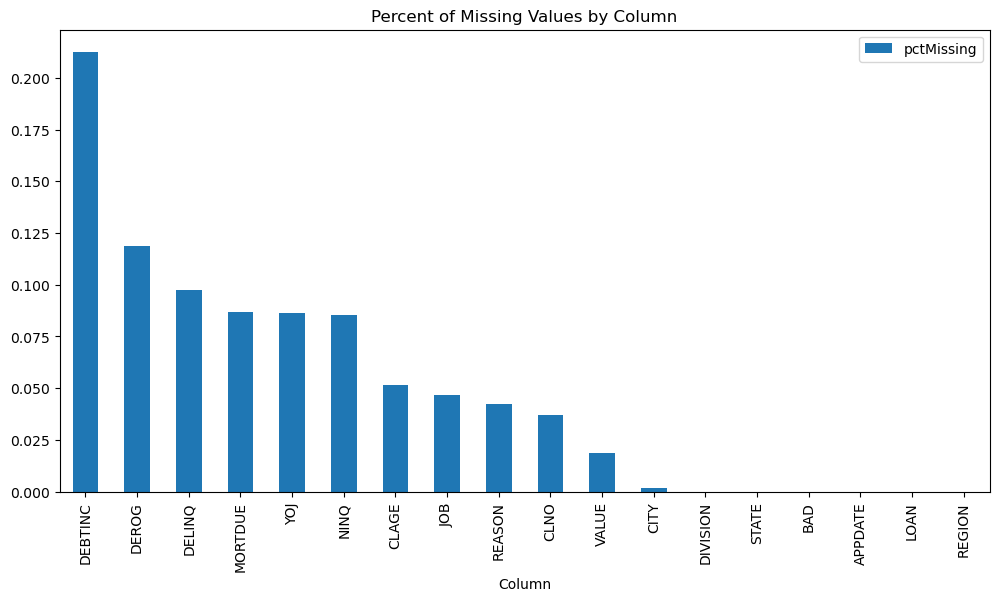

In [44]:
distinct_df.plot(x='Column', y='pctMissing', kind = 'bar', 
                 figsize = (12,6), title='Percent of Missing Values by Column');

Store a list of columns that having missing values using pandas on the client.

In [45]:
columnsWithMissingValues = (distinct_df
                            .query('NMiss > 0')
                            .loc[:,'Column']
                            .to_list())

columnsWithMissingValues

['DEBTINC',
 'DEROG',
 'DELINQ',
 'MORTDUE',
 'YOJ',
 'NINQ',
 'CLAGE',
 'JOB',
 'REASON',
 'CLNO',
 'VALUE',
 'CITY']

### e. Explore categorical columns

Use the SWAT package value_counts method on the CAS table to summarize the data in CAS. The SWAT value_counts method returns a series to the Python client as expected.

In [46]:
(rawTbl                           ## CASTable object
 .Bad                             ## CAS table column
 .value_counts(normalize=True))   ## SWAT package value_counts method (using the pandas API)

0.0    0.800503
1.0    0.199497
dtype: float64

Create a Python loop to summarize the data in the distributed CAS server and then plot the Series returned from the CAS server on the Python client using pandas.

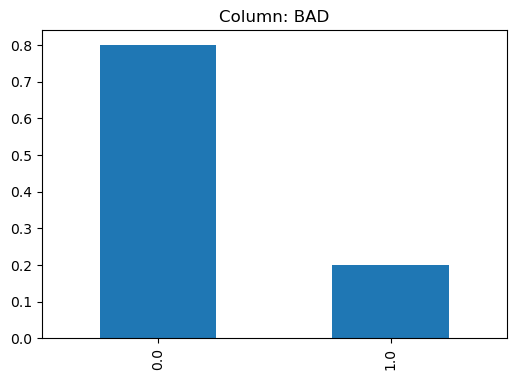

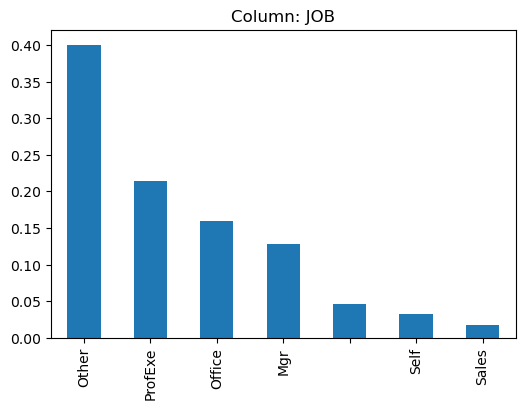

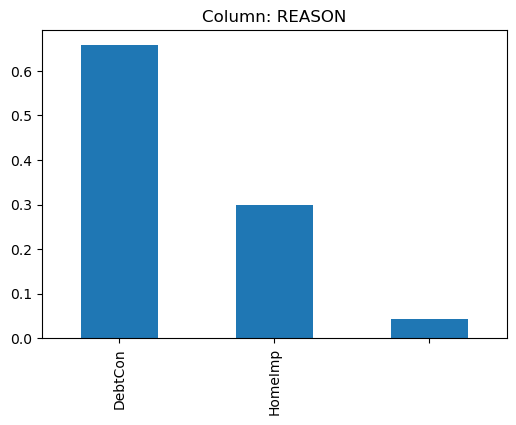

In [47]:
colNames = ['BAD','JOB','REASON']

for col in colNames:
    uniqueCounts = (rawTbl[col]                                   ## CASTable object
                    .value_counts(normalize=True, dropna=False)   ## SWAT package value_counts method to process in the distributed CAS server
                    .plot(kind = 'bar',                           ## Plot the Series returned from the CAS server on the Python client
                          title = f'Column: {col}', 
                          figsize=(6,4))
                   )
    plt.show()

You can also use the [simple.freq](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casanpg/cas-simple-freq.htm) CAS action to get similar results.

In [48]:
rawTbl.freq(inputs = colNames)

[Frequency]

 Frequency for HOME_EQUITY_RAW
 
     Column  NumVar  CharVar        FmtVar  Level  Frequency
 0      BAD     0.0                      0      1     4771.0
 1      BAD     1.0                      1      2     1189.0
 2      JOB     NaN                             1      279.0
 3      JOB     NaN      Mgr           Mgr      2      767.0
 4      JOB     NaN   Office        Office      3      948.0
 5      JOB     NaN    Other         Other      4     2388.0
 6      JOB     NaN  ProfExe       ProfExe      5     1276.0
 7      JOB     NaN    Sales         Sales      6      109.0
 8      JOB     NaN     Self          Self      7      193.0
 9   REASON     NaN                             1      252.0
 10  REASON     NaN  DebtCon       DebtCon      2     3928.0
 11  REASON     NaN  HomeImp       HomeImp      3     1780.0

+ Elapsed: 0.0381s, user: 0.0442s, sys: 0.0956s, mem: 87.5mb

### f. Explore numeric columns

You can use the pandas API describe method with the SWAT package to process in the CAS server.

In [49]:
rawTbl.describe()

BAD          LOAN        MORTDUE          VALUE          YOJ        DEROG       DELINQ        CLAGE         NINQ         CLNO      DEBTINC       APPDATE
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000  5252.000000  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000   5960.000000
mean      0.199497  18607.969799   73760.817200  101776.048741     8.922268     0.254570     0.449442   179.766275     1.186055    21.296096    33.779915  21657.131208
std       0.399656  11207.480417   44457.609458   57385.775334     7.573982     0.846047     1.127266    85.810092     1.728675    10.138933     8.601746    519.756837
min       0.000000   1100.000000    2063.000000    8000.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.524499  20820.000000
25%       0.000000  11100.000000   46268.000000   66069.000000     3.000000     0.000000     0.000000   115.103197     0.000000    15.000000    29.140031  21204.000000
50%       0.000000  16300.000000   65019.000000   89235.500000     7.000000     0.000000     0.000000   173.466667     1.000000    20.000000    34.818262  21623.500000
75%       0.000000  23300.000000   91491.000000  119831.500000    13.000000     0.000000     0.000000   231.574834     2.000000    26.000000    39.003141  22087.000000
max       1.000000  89900.000000  399550.000000  855909.000000    41.000000    10.000000    15.000000  1168.233561    17.000000    71.000000   203.312149  22645.000000

The [simple.summary](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casanpg/cas-simple-summary.htm) action can get similar results.

In [50]:
rawTbl.summary()

[Summary]

 Descriptive Statistics for HOME_EQUITY_RAW
 
      Column           Min            Max       N   NMiss           Mean           Sum           Std      StdErr           Var           USS           CSS          CV       TValue          ProbT  Skewness   Kurtosis
 0       BAD      0.000000       1.000000  5960.0     0.0       0.199497  1.189000e+03      0.399656    0.005177  1.597245e-01  1.189000e+03  9.517985e+02  200.331950    38.536557  2.720203e-290  1.504317   0.263057
 1      LOAN   1100.000000   89900.000000  5960.0     0.0   18607.969799  1.109035e+08  11207.480417  145.172668  1.256076e+08  2.812185e+12  7.484958e+11   60.229464   128.178190   0.000000e+00  2.023781   6.932590
 2   MORTDUE   2063.000000  399550.000000  5442.0   518.0   73760.817200  4.014064e+08  44457.609458  602.652327  1.976479e+09  4.036208e+13  1.075402e+13   60.272664   122.393649   0.000000e+00  1.814481   6.481866
 3     VALUE   8000.000000  855909.000000  5848.0   112.0  101776.048741  5.951863e+08  57385.775334  750.413385  3.293127e+09  7.983063e+13  1.925491e+13   56.384362   135.626644   0.000000e+00  3.053344  24.362805
 4       YOJ      0.000000      41.000000  5445.0   515.0       8.922268  4.858175e+04      7.573982    0.102642  5.736521e+01  7.457556e+05  3.122962e+05   84.888530    86.926047   0.000000e+00  0.988460   0.372072
 5     DEROG      0.000000      10.000000  5252.0   708.0       0.254570  1.337000e+03      0.846047    0.011674  7.157951e-01  4.099000e+03  3.758640e+03  332.343880    21.805933  5.478603e-101  5.320870  36.872763
 6    DELINQ      0.000000      15.000000  5380.0   580.0       0.449442  2.418000e+03      1.127266    0.015369  1.270728e+00  7.922000e+03  6.835248e+03  250.814336    29.244135  1.326786e-174  4.023150  23.565449
 7     CLAGE      0.000000    1168.233561  5652.0   308.0     179.766275  1.016039e+06     85.810092    1.141398  7.363372e+03  2.242600e+08  4.161041e+07   47.734255   157.496508   0.000000e+00  1.343412   7.599549
 8      NINQ      0.000000      17.000000  5450.0   510.0       1.186055  6.464000e+03      1.728675    0.023416  2.988317e+00  2.395000e+04  1.628334e+04  145.749978    50.651202   0.000000e+00  2.621984   9.786507
 9      CLNO      0.000000      71.000000  5738.0   222.0      21.296096  1.221970e+05     10.138933    0.133848  1.027980e+02  3.192071e+06  5.897519e+05   47.609351   159.106532   0.000000e+00  0.775052   1.157673
 10  DEBTINC      0.524499     203.312149  4693.0  1267.0      33.779915  1.585291e+05      8.601746    0.125563  7.399004e+01  5.702262e+06  3.471613e+05   25.464084   269.027831   0.000000e+00  2.852353  50.504042
 11  APPDATE  20820.000000   22645.000000  5960.0     0.0   21657.131208  1.290765e+08    519.756837    6.732511  2.701472e+05  2.797037e+12  1.609807e+09    2.399934  3216.798420   0.000000e+00  0.164909  -1.143734

+ Elapsed: 0.0304s, user: 0.0445s, sys: 0.0764s, mem: 31.4mb

#### Compare processing speeds of CAS actions and SWAT methods

Pandas API methods from the SWAT package are converted into actions behind the scenes through the CAS API. 

CAS actions are sent to the CAS server for processing.

You will find that the actions will run faster.

You can view the actions that are called by the pandas API methods in the SWAT package by turning on the following options:
- *swat.options.cas.trace_ui_actions = True*
- *swat.options.cas.trace_actions = True*

In [51]:
%%capture pandasAPISWAT_time
%%timeit
rawTbl.describe()

In [52]:
%%capture action_time
%%timeit
rawTbl.summary()

In [53]:
display(f'SWAT Pandas API: {pandasAPISWAT_time}', f'CAS Action: {action_time} ms')

## Store the timing from the captured results
pandasAPISWAT_time = float(pandasAPISWAT_time.stdout.split(' ')[0])
action_time = float(action_time.stdout.split(' ')[0])

## Display values
display()
display(f'{pandasAPISWAT_time} ms', f'{action_time} ms')

'SWAT Pandas API: 907 ms +- 218 ms per loop (mean +- std. dev. of 7 runs, 1 loop each)\n'

'CAS Action: 100 ms +- 2.08 ms per loop (mean +- std. dev. of 7 runs, 10 loops each)\n ms'

'907.0 ms'

'100.0 ms'

In [54]:
def timeFaster(pandasSWAT_time, action_time):
    timeFaster = pandasSWAT_time/action_time
    print(f'The action executed about {round(timeFaster,0)} times faster')
    
timeFaster(pandasAPISWAT_time, action_time)

The action executed about 9.0 times faster


### g. Use SQL in the distributed CAS server
Load the [fedSQL action set](https://go.documentation.sas.com/doc/en/pgmsascdc/v_038/caspg/cas-fedsql-TblOfActions.htm) to use SQL in CAS.

In [55]:
conn.loadActionSet('fedSQL')

NOTE: Added action set 'fedSQL'.


[actionset]

 'fedSQL'

+ Elapsed: 0.0133s, user: 0.0124s, sys: 0.0186s, mem: 1.21mb

You can execute SQL in the CAS server using the execDirection action. Simply pass your query as a string in the query parameter.

In [56]:
myQuery = '''
    select DIVISION, BAD, count(*) as TotalCount
        from casuser.HOME_EQUITY_RAW
        group by DIVISION, BAD
        order by DIVISION, BAD
'''

conn.execdirect(query = myQuery)

[Result Set]

               DIVISION  BAD  TOTALCOUNT
 0   East North Central  0.0         675
 1   East North Central  1.0         176
 2   East South Central  0.0         275
 3   East South Central  1.0          73
 4      Middle Atlantic  0.0         615
 5      Middle Atlantic  1.0         148
 6             Mountain  0.0         365
 7             Mountain  1.0          85
 8          New England  0.0         212
 9          New England  1.0          60
 10             Pacific  0.0         761
 11             Pacific  1.0         203
 12      South Atlantic  0.0         940
 13      South Atlantic  1.0         249
 14  West North Central  0.0         332
 15  West North Central  1.0          57
 16  West South Central  0.0         596
 17  West South Central  1.0         138

+ Elapsed: 0.215s, user: 1.12s, sys: 1.13s, mem: 910mb

## 4. Prepare the final data

#### Data requirements
- a. Update columns in the CAS table
    - Standardize the case in the REASON, JOB and CITY colum
    - Round the CLAGE column
- b. Impute columns with missing values
    - Interval(numeric) columns with the mean
    - Nominal(character) columns with the mode
- c. Add a SAS date format to the APPDATE column
- d. Create new calculated columns
    - YEAR = Year of the application
    - QTR = Quarter of the application
    - DATE_SINCE_LAST_APP = Days since the last application (Dynamic, always use today's date)
- e. Create the final CAS table
- f. Save the CAS table to disk as a parquet/sashdat/csv file in the shared **Public** caslib

In [57]:
rawTbl.head()

Selected Rows from Table HOME_EQUITY_RAW

   BAD     LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO    DEBTINC  APPDATE          CITY       STATE            DIVISION     REGION
0  0.0  16500.0  77049.0   98658.0  DebtCon    Other   5.0    3.0     0.0   77.992816   0.0  21.0  23.120074  21016.0       mankato   Minnesota  West North Central    Midwest
1  1.0  16500.0  92900.0  116000.0  DebtCon      Mgr  10.0    1.0     NaN   83.166667   1.0  27.0        NaN  21882.0     bremerton  Washington             Pacific       West
2  0.0  16500.0  64081.0  100796.0  HomeImp  ProfExe  22.0    0.0     1.0  243.941686   1.0  24.0  38.327816  21669.0        ocilla     Georgia      South Atlantic      South
3  0.0  16500.0  23169.0   41677.0  DebtCon  ProfExe  20.0    0.0     0.0  208.076943   2.0  15.0  34.430575  20930.0   west orange  New Jersey     Middle Atlantic  Northeast
4  1.0  16500.0  48833.0   68872.0  DebtCon    Other   1.0    0.0     0.0   60.390652   0.0  12.0  22.459624  21428.0  hopkinsville    Kentucky  East South Central      South

### a. Update columns in the CAS table

The [table.update](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-update.htm) CAS action will update rows in a CAS table. The set parameter accepts a list of dictionaries. Each dictionary specifies the column to update and how to update it.

- The var key specifies the column to update
- The value key specifies how to update it. [SAS functions are required](https://go.documentation.sas.com/doc/en/pgmsascdc/v_038/lefunctionsref/p1q8bq2v0o11n6n1gpij335fqpph.htm?fromDefault=).

In [58]:
## Specify a dictionary for each column to update
updateReason = {'var':'REASON', 'value':'upcase(REASON)'}

updateJob = {'var':'JOB','value':'upcase(JOB)'}

updateCity = {'var':'CITY', 'value':'propcase(CITY)'}

roundCLAGE = {'var':'CLAGE', 'value': 'round(CLAGE)'}

## Update the columns. Requires a list of dictionaries in the set parameter
rawTbl.update(set = [
                updateReason,
                updateJob,
                updateCity,
                roundCLAGE
                ])

[rowsUpdated]

 5960

[tableName]

 'HOME_EQUITY_RAW'

+ Elapsed: 0.0447s, user: 0.1s, sys: 0.156s, mem: 25.6mb

In [59]:
rawTbl.head()

Selected Rows from Table HOME_EQUITY_RAW

   BAD     LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  CLAGE  NINQ  CLNO    DEBTINC  APPDATE          CITY       STATE            DIVISION     REGION
0  0.0  16500.0  77049.0   98658.0  DEBTCON    OTHER   5.0    3.0     0.0   78.0   0.0  21.0  23.120074  21016.0       Mankato   Minnesota  West North Central    Midwest
1  1.0  16500.0  92900.0  116000.0  DEBTCON      MGR  10.0    1.0     NaN   83.0   1.0  27.0        NaN  21882.0     Bremerton  Washington             Pacific       West
2  0.0  16500.0  64081.0  100796.0  HOMEIMP  PROFEXE  22.0    0.0     1.0  244.0   1.0  24.0  38.327816  21669.0        Ocilla     Georgia      South Atlantic      South
3  0.0  16500.0  23169.0   41677.0  DEBTCON  PROFEXE  20.0    0.0     0.0  208.0   2.0  15.0  34.430575  20930.0   West Orange  New Jersey     Middle Atlantic  Northeast
4  1.0  16500.0  48833.0   68872.0  DEBTCON    OTHER   1.0    0.0     0.0   60.0   0.0  12.0  22.459624  21428.0  Hopkinsville    Kentucky  East South Central      South

### b. Impute columns with missing values

Use the list of columns with missing values we created earlier.

In [60]:
columnsWithMissingValues

['DEBTINC',
 'DEROG',
 'DELINQ',
 'MORTDUE',
 'YOJ',
 'NINQ',
 'CLAGE',
 'JOB',
 'REASON',
 'CLNO',
 'VALUE',
 'CITY']

Use the [dataPreprocess.impute](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casanpg/cas-datapreprocess-impute.htm) action to impute all interval missing values with the mean, all nominal values with the mode. Create a new CAS table named home_equity_impute in the Casuser caslib. Use the copyAllVars parameter to keep all original columns.

In [61]:
rawTbl.impute(inputs = columnsWithMissingValues,                         ## Columns to impute
              methodInterval = 'MEAN',                                   ## How to impute interval columns
              methodNominal = 'MODE',                                    ## How to impute nominal columns
              copyAllVars = True,                                        ## Keep all original columns
              casOut = {'name':'home_equity_impute',                     ## Output CAS table information
                        'caslib':'casuser',
                        'label':'Imputed missing values raw data',
                        'replace':True})

[ImputeInfo]

 Imputation Information for HOME_EQUITY_RAW
 
    Variable ImputeTech    ResultVar       N   NMiss  ImputedValueContinuous ImputedValueNominal
 0   DEBTINC       Mean  IMP_DEBTINC  4693.0  1267.0               33.779915                    
 1     DEROG       Mean    IMP_DEROG  5252.0   708.0                0.254570                    
 2    DELINQ       Mean   IMP_DELINQ  5380.0   580.0                0.449442                    
 3   MORTDUE       Mean  IMP_MORTDUE  5442.0   518.0            73760.817200                    
 4       YOJ       Mean      IMP_YOJ  5445.0   515.0                8.922268                    
 5      NINQ       Mean     IMP_NINQ  5450.0   510.0                1.186055                    
 6     CLAGE       Mean    IMP_CLAGE  5652.0   308.0              179.771762                    
 7       JOB       Mode      IMP_JOB  5681.0   279.0                     NaN               OTHER
 8    REASON       Mode   IMP_REASON  5708.0   252.0                     NaN             DEBTCON
 9      CLNO       Mean     IMP_CLNO  5738.0   222.0               21.296096                    
 10    VALUE       Mean    IMP_VALUE  5848.0   112.0           101776.048741                    
 11     CITY       Mode     IMP_CITY  5948.0    12.0                     NaN         Westminster

[OutputCasTables]

                              casLib                Name                            Label  Rows  Columns                                                                   casTable
 0  CASUSER(Peter.Styliadis@sas.com)  home_equity_impute  Imputed missing values raw data  5960       30  CASTable('home_equity_impute', caslib='CASUSER(Peter.Styliadis@sas.com)')

+ Elapsed: 0.11s, user: 0.128s, sys: 0.253s, mem: 424mb

View available CAS tables. Notice that another table is now in-memory.

In [62]:
conn.tableInfo(caslib = 'casuser')

[TableInfo]

                  Name                            Label  Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart               SourceName                      SourceCaslib  Compressed                  Creator                 Modifier SourceModTimeFormatted  SourceModTime
 0     HOME_EQUITY_RAW                                   5960       18               0    utf-8  2023-05-18T13:13:59+00:00  2023-05-18T13:14:22+00:00  2023-05-18T13:14:24+00:00        UTF8  2.000035e+09  2.000035e+09  2.000035e+09       0         0     0          0  home_equity_raw.parquet  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com  Peter.Styliadis@sas.com                                   NaN
 1  HOME_EQUITY_IMPUTE  Imputed missing values raw data  5960       30               0    utf-8  2023-05-18T13:14:24+00:00  2023-05-18T13:14:24+00:00  2023-05-18T13:14:24+00:00        UTF8  2.000035e+09  2.000035e+09  2.000035e+09       0         0     0          0                                                                      0  Peter.Styliadis@sas.com                                                            NaN

+ Elapsed: 0.00748s, user: 0.0016s, sys: 0.0155s, mem: 1.83mb

Reference the new imputed CAS table.

In [63]:
imputeTbl = conn.CASTable('home_equity_impute', caslib = 'casuser')
imputeTbl

CASTable('home_equity_impute', caslib='casuser')

In [64]:
imputeTbl.head()

Selected Rows from Table HOME_EQUITY_IMPUTE

   BAD     LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  CLAGE  NINQ  CLNO    DEBTINC  APPDATE          CITY       STATE            DIVISION     REGION  IMP_CLAGE  IMP_CLNO  IMP_DEBTINC  IMP_DELINQ  IMP_DEROG  IMP_MORTDUE  IMP_NINQ  IMP_VALUE  IMP_YOJ      IMP_CITY  IMP_JOB IMP_REASON
0  0.0  16500.0  77049.0   98658.0  DEBTCON    OTHER   5.0    3.0     0.0   78.0   0.0  21.0  23.120074  21016.0       Mankato   Minnesota  West North Central    Midwest       78.0      21.0    23.120074    0.000000        3.0      77049.0       0.0    98658.0      5.0       Mankato    OTHER    DEBTCON
1  1.0  16500.0  92900.0  116000.0  DEBTCON      MGR  10.0    1.0     NaN   83.0   1.0  27.0        NaN  21882.0     Bremerton  Washington             Pacific       West       83.0      27.0    33.779915    0.449442        1.0      92900.0       1.0   116000.0     10.0     Bremerton      MGR    DEBTCON
2  0.0  16500.0  64081.0  100796.0  HOMEIMP  PROFEXE  22.0    0.0     1.0  244.0   1.0  24.0  38.327816  21669.0        Ocilla     Georgia      South Atlantic      South      244.0      24.0    38.327816    1.000000        0.0      64081.0       1.0   100796.0     22.0        Ocilla  PROFEXE    HOMEIMP
3  0.0  16500.0  23169.0   41677.0  DEBTCON  PROFEXE  20.0    0.0     0.0  208.0   2.0  15.0  34.430575  20930.0   West Orange  New Jersey     Middle Atlantic  Northeast      208.0      15.0    34.430575    0.000000        0.0      23169.0       2.0    41677.0     20.0   West Orange  PROFEXE    DEBTCON
4  1.0  16500.0  48833.0   68872.0  DEBTCON    OTHER   1.0    0.0     0.0   60.0   0.0  12.0  22.459624  21428.0  Hopkinsville    Kentucky  East South Central      South       60.0      12.0    22.459624    0.000000        0.0      48833.0       0.0    68872.0      1.0  Hopkinsville    OTHER    DEBTCON

Confirm the new columns do not contain missing values.

In [65]:
imputeTbl.distinct()

[Distinct]

 Distinct Counts for HOME_EQUITY_IMPUTE
 
          Column  NDistinct   NMiss  Trunc
 0           BAD        2.0     0.0    0.0
 1          LOAN      540.0     0.0    0.0
 2       MORTDUE     5054.0   518.0    0.0
 3         VALUE     5382.0   112.0    0.0
 4        REASON        3.0   252.0    0.0
 5           JOB        7.0   279.0    0.0
 6           YOJ      100.0   515.0    0.0
 7         DEROG       12.0   708.0    0.0
 8        DELINQ       15.0   580.0    0.0
 9         CLAGE      424.0   308.0    0.0
 10         NINQ       17.0   510.0    0.0
 11         CLNO       63.0   222.0    0.0
 12      DEBTINC     4694.0  1267.0    0.0
 13      APPDATE     1755.0     0.0    0.0
 14         CITY      858.0    12.0    0.0
 15        STATE       51.0     0.0    0.0
 16     DIVISION        9.0     0.0    0.0
 17       REGION        4.0     0.0    0.0
 18    IMP_CLAGE      424.0     0.0    0.0
 19     IMP_CLNO       63.0     0.0    0.0
 20  IMP_DEBTINC     4694.0     0.0    0.0
 21   IMP_DELINQ       15.0     0.0    0.0
 22    IMP_DEROG       12.0     0.0    0.0
 23  IMP_MORTDUE     5054.0     0.0    0.0
 24     IMP_NINQ       17.0     0.0    0.0
 25    IMP_VALUE     5382.0     0.0    0.0
 26      IMP_YOJ      100.0     0.0    0.0
 27     IMP_CITY      857.0     0.0    0.0
 28      IMP_JOB        6.0     0.0    0.0
 29   IMP_REASON        2.0     0.0    0.0

+ Elapsed: 0.05s, user: 0.123s, sys: 0.0653s, mem: 84.4mb

### c. Add a SAS date format to the APPDATE column

The APPDATE column is a SAS date value that specifies the date. SAS dates are stored as the number of days after January 1, 1960.

In [66]:
imputeTbl.head()

Selected Rows from Table HOME_EQUITY_IMPUTE

   BAD     LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  CLAGE  NINQ  CLNO    DEBTINC  APPDATE          CITY       STATE            DIVISION     REGION  IMP_CLAGE  IMP_CLNO  IMP_DEBTINC  IMP_DELINQ  IMP_DEROG  IMP_MORTDUE  IMP_NINQ  IMP_VALUE  IMP_YOJ      IMP_CITY  IMP_JOB IMP_REASON
0  0.0  16500.0  77049.0   98658.0  DEBTCON    OTHER   5.0    3.0     0.0   78.0   0.0  21.0  23.120074  21016.0       Mankato   Minnesota  West North Central    Midwest       78.0      21.0    23.120074    0.000000        3.0      77049.0       0.0    98658.0      5.0       Mankato    OTHER    DEBTCON
1  1.0  16500.0  92900.0  116000.0  DEBTCON      MGR  10.0    1.0     NaN   83.0   1.0  27.0        NaN  21882.0     Bremerton  Washington             Pacific       West       83.0      27.0    33.779915    0.449442        1.0      92900.0       1.0   116000.0     10.0     Bremerton      MGR    DEBTCON
2  0.0  16500.0  64081.0  100796.0  HOMEIMP  PROFEXE  22.0    0.0     1.0  244.0   1.0  24.0  38.327816  21669.0        Ocilla     Georgia      South Atlantic      South      244.0      24.0    38.327816    1.000000        0.0      64081.0       1.0   100796.0     22.0        Ocilla  PROFEXE    HOMEIMP
3  0.0  16500.0  23169.0   41677.0  DEBTCON  PROFEXE  20.0    0.0     0.0  208.0   2.0  15.0  34.430575  20930.0   West Orange  New Jersey     Middle Atlantic  Northeast      208.0      15.0    34.430575    0.000000        0.0      23169.0       2.0    41677.0     20.0   West Orange  PROFEXE    DEBTCON
4  1.0  16500.0  48833.0   68872.0  DEBTCON    OTHER   1.0    0.0     0.0   60.0   0.0  12.0  22.459624  21428.0  Hopkinsville    Kentucky  East South Central      South       60.0      12.0    22.459624    0.000000        0.0      48833.0       0.0    68872.0      1.0  Hopkinsville    OTHER    DEBTCON

You can use the [table.alterTable action](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-altertable.htm) to rename tables, change labels and formats in columns and drop columns.

Add a SAS date format to the APPDATE column to display the date.

In [67]:
imputeTbl.alterTable(columns = [
    {'name':'APPDATE', 'format':'mmddyy10'}
])

imputeTbl.head()

Selected Rows from Table HOME_EQUITY_IMPUTE

   BAD     LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  CLAGE  NINQ  CLNO    DEBTINC     APPDATE          CITY       STATE            DIVISION     REGION  IMP_CLAGE  IMP_CLNO  IMP_DEBTINC  IMP_DELINQ  IMP_DEROG  IMP_MORTDUE  IMP_NINQ  IMP_VALUE  IMP_YOJ      IMP_CITY  IMP_JOB IMP_REASON
0  0.0  16500.0  77049.0   98658.0  DEBTCON    OTHER   5.0    3.0     0.0   78.0   0.0  21.0  23.120074  2017-07-16       Mankato   Minnesota  West North Central    Midwest       78.0      21.0    23.120074    0.000000        3.0      77049.0       0.0    98658.0      5.0       Mankato    OTHER    DEBTCON
1  1.0  16500.0  92900.0  116000.0  DEBTCON      MGR  10.0    1.0     NaN   83.0   1.0  27.0        NaN  2019-11-29     Bremerton  Washington             Pacific       West       83.0      27.0    33.779915    0.449442        1.0      92900.0       1.0   116000.0     10.0     Bremerton      MGR    DEBTCON
2  0.0  16500.0  64081.0  100796.0  HOMEIMP  PROFEXE  22.0    0.0     1.0  244.0   1.0  24.0  38.327816  2019-04-30        Ocilla     Georgia      South Atlantic      South      244.0      24.0    38.327816    1.000000        0.0      64081.0       1.0   100796.0     22.0        Ocilla  PROFEXE    HOMEIMP
3  0.0  16500.0  23169.0   41677.0  DEBTCON  PROFEXE  20.0    0.0     0.0  208.0   2.0  15.0  34.430575  2017-04-21   West Orange  New Jersey     Middle Atlantic  Northeast      208.0      15.0    34.430575    0.000000        0.0      23169.0       2.0    41677.0     20.0   West Orange  PROFEXE    DEBTCON
4  1.0  16500.0  48833.0   68872.0  DEBTCON    OTHER   1.0    0.0     0.0   60.0   0.0  12.0  22.459624  2018-09-01  Hopkinsville    Kentucky  East South Central      South       60.0      12.0    22.459624    0.000000        0.0      48833.0       0.0    68872.0      1.0  Hopkinsville    OTHER    DEBTCON

### d. Create new calculated columns

Use the eval method to create new columns in the CAS table.

**The eval method enables you to use [SAS functions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/lefunctionsref/p1q8bq2v0o11n6n1gpij335fqpph.htm) and assignment statements to create columns.**

In [68]:
imputeTbl.eval('YEAR = year(APPDATE)')

imputeTbl.eval('QTR = qtr(APPDATE)')

imputeTbl.eval('DATE_SINCE_LAST_APP = today() - APPDATE')

View the parameters of the CASTable object. Notice that the eval method added how to create the calculated columns.

CASTable objects are lazily evaluated. The object knows how to create the new columns, but will not create them until an action or method is specified on the CASTable object.

In [69]:
imputeTbl.params

{'name': 'home_equity_impute',
 'caslib': 'casuser',
 'computedvars': ['YEAR', 'QTR', 'DATE_SINCE_LAST_APP'],
 'computedvarsprogram': 'YEAR =  year(APPDATE); YEAR = YEAR; QTR =  qtr(APPDATE); QTR = QTR; DATE_SINCE_LAST_APP =  today() - APPDATE; DATE_SINCE_LAST_APP = DATE_SINCE_LAST_APP; '}

In [70]:
imputeTbl.head()

Selected Rows from Table HOME_EQUITY_IMPUTE

   BAD     LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  CLAGE  NINQ  CLNO    DEBTINC     APPDATE          CITY       STATE            DIVISION     REGION  IMP_CLAGE  IMP_CLNO  IMP_DEBTINC  IMP_DELINQ  IMP_DEROG  IMP_MORTDUE  IMP_NINQ  IMP_VALUE  IMP_YOJ      IMP_CITY  IMP_JOB IMP_REASON    YEAR  QTR  DATE_SINCE_LAST_APP
0  0.0  16500.0  77049.0   98658.0  DEBTCON    OTHER   5.0    3.0     0.0   78.0   0.0  21.0  23.120074  2017-07-16       Mankato   Minnesota  West North Central    Midwest       78.0      21.0    23.120074    0.000000        3.0      77049.0       0.0    98658.0      5.0       Mankato    OTHER    DEBTCON  2017.0  3.0               2132.0
1  1.0  16500.0  92900.0  116000.0  DEBTCON      MGR  10.0    1.0     NaN   83.0   1.0  27.0        NaN  2019-11-29     Bremerton  Washington             Pacific       West       83.0      27.0    33.779915    0.449442        1.0      92900.0       1.0   116000.0     10.0     Bremerton      MGR    DEBTCON  2019.0  4.0               1266.0
2  0.0  16500.0  64081.0  100796.0  HOMEIMP  PROFEXE  22.0    0.0     1.0  244.0   1.0  24.0  38.327816  2019-04-30        Ocilla     Georgia      South Atlantic      South      244.0      24.0    38.327816    1.000000        0.0      64081.0       1.0   100796.0     22.0        Ocilla  PROFEXE    HOMEIMP  2019.0  2.0               1479.0
3  0.0  16500.0  23169.0   41677.0  DEBTCON  PROFEXE  20.0    0.0     0.0  208.0   2.0  15.0  34.430575  2017-04-21   West Orange  New Jersey     Middle Atlantic  Northeast      208.0      15.0    34.430575    0.000000        0.0      23169.0       2.0    41677.0     20.0   West Orange  PROFEXE    DEBTCON  2017.0  2.0               2218.0
4  1.0  16500.0  48833.0   68872.0  DEBTCON    OTHER   1.0    0.0     0.0   60.0   0.0  12.0  22.459624  2018-09-01  Hopkinsville    Kentucky  East South Central      South       60.0      12.0    22.459624    0.000000        0.0      48833.0       0.0    68872.0      1.0  Hopkinsville    OTHER    DEBTCON  2018.0  3.0               1720.0

### e. Create the final CAS table

Use the [table.copyTable action](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-copytable.htm) to create a new final CAS table that contains the updated rows, imputed missing values and calculated columns. 

In [71]:
imputeTbl.copyTable(casout = {'name':'home_equity_final', 
                              'caslib':'casuser',
                              'label':'Final home equity table',
                              'replace':True})

conn.tableInfo(caslib = 'casuser')

[TableInfo]

                  Name                            Label  Rows  Columns  IndexedColumns Encoding        CreateTimeFormatted           ModTimeFormatted        AccessTimeFormatted JavaCharSet    CreateTime       ModTime    AccessTime  Global  Repeated  View  MultiPart               SourceName                      SourceCaslib  Compressed                  Creator                 Modifier SourceModTimeFormatted  SourceModTime
 0     HOME_EQUITY_RAW                                   5960       18               0    utf-8  2023-05-18T13:13:59+00:00  2023-05-18T13:14:22+00:00  2023-05-18T13:14:24+00:00        UTF8  2.000035e+09  2.000035e+09  2.000035e+09       0         0     0          0  home_equity_raw.parquet  CASUSER(Peter.Styliadis@sas.com)           0  Peter.Styliadis@sas.com  Peter.Styliadis@sas.com                                   NaN
 1  HOME_EQUITY_IMPUTE  Imputed missing values raw data  5960       30               0    utf-8  2023-05-18T13:14:24+00:00  2023-05-18T13:14:25+00:00  2023-05-18T13:14:25+00:00        UTF8  2.000035e+09  2.000035e+09  2.000035e+09       0         0     0          0                                                                      0  Peter.Styliadis@sas.com                                                            NaN
 2   HOME_EQUITY_FINAL          Final home equity table  5960       33               0    utf-8  2023-05-18T13:14:25+00:00  2023-05-18T13:14:25+00:00  2023-05-18T13:14:25+00:00        UTF8  2.000035e+09  2.000035e+09  2.000035e+09       0         0     0          0                                                                      0  Peter.Styliadis@sas.com                                                            NaN

+ Elapsed: 0.00877s, user: 0.00544s, sys: 0.0129s, mem: 1.84mb

Reference the new final CAS table.

In [72]:
finalTbl = conn.CASTable('home_equity_final', caslib = 'casuser')
finalTbl

CASTable('home_equity_final', caslib='casuser')

In [73]:
finalTbl.head()

Selected Rows from Table HOME_EQUITY_FINAL

   BAD     LOAN  MORTDUE     VALUE   REASON      JOB   YOJ  DEROG  DELINQ  CLAGE  NINQ  CLNO    DEBTINC     APPDATE          CITY       STATE            DIVISION     REGION  IMP_CLAGE  IMP_CLNO  IMP_DEBTINC  IMP_DELINQ  IMP_DEROG  IMP_MORTDUE  IMP_NINQ  IMP_VALUE  IMP_YOJ      IMP_CITY  IMP_JOB IMP_REASON    YEAR  QTR  DATE_SINCE_LAST_APP
0  0.0  16500.0  77049.0   98658.0  DEBTCON    OTHER   5.0    3.0     0.0   78.0   0.0  21.0  23.120074  2017-07-16       Mankato   Minnesota  West North Central    Midwest       78.0      21.0    23.120074    0.000000        3.0      77049.0       0.0    98658.0      5.0       Mankato    OTHER    DEBTCON  2017.0  3.0               2132.0
1  1.0  16500.0  92900.0  116000.0  DEBTCON      MGR  10.0    1.0     NaN   83.0   1.0  27.0        NaN  2019-11-29     Bremerton  Washington             Pacific       West       83.0      27.0    33.779915    0.449442        1.0      92900.0       1.0   116000.0     10.0     Bremerton      MGR    DEBTCON  2019.0  4.0               1266.0
2  0.0  16500.0  64081.0  100796.0  HOMEIMP  PROFEXE  22.0    0.0     1.0  244.0   1.0  24.0  38.327816  2019-04-30        Ocilla     Georgia      South Atlantic      South      244.0      24.0    38.327816    1.000000        0.0      64081.0       1.0   100796.0     22.0        Ocilla  PROFEXE    HOMEIMP  2019.0  2.0               1479.0
3  0.0  16500.0  23169.0   41677.0  DEBTCON  PROFEXE  20.0    0.0     0.0  208.0   2.0  15.0  34.430575  2017-04-21   West Orange  New Jersey     Middle Atlantic  Northeast      208.0      15.0    34.430575    0.000000        0.0      23169.0       2.0    41677.0     20.0   West Orange  PROFEXE    DEBTCON  2017.0  2.0               2218.0
4  1.0  16500.0  48833.0   68872.0  DEBTCON    OTHER   1.0    0.0     0.0   60.0   0.0  12.0  22.459624  2018-09-01  Hopkinsville    Kentucky  East South Central      South       60.0      12.0    22.459624    0.000000        0.0      48833.0       0.0    68872.0      1.0  Hopkinsville    OTHER    DEBTCON  2018.0  3.0               1720.0

### f. Save CAS table to disk

We will want to save the in-memory CAS table to disk to store a permanent copy of the table. You can save a CAS table in a variety of file formats using the [table.save action](https://go.documentation.sas.com/doc/en/pgmsascdc/default/caspg/cas-table-save.htm). You can save to file formats like sashdat, parquet, csv and more. You can also save a CAS table back to a database.

In [74]:
finalTbl.save(name = 'home_equity_final.sashdat', caslib = 'public', replace = True)

NOTE: Cloud Analytic Services saved the file home_equity_final.sashdat in caslib Public.


[caslib]

 'Public'

[name]

 'home_equity_final.sashdat'

+ Elapsed: 0.0603s, user: 0.00767s, sys: 0.0753s, mem: 70.7mb

In [75]:
conn.fileInfo(caslib = 'public', path='home_%')

[FileInfo]

    Permission Owner Group                       Name     Size Encryption                       Time       ModTime
 0  -rwxr-xr-x   sas   sas  home_equity_final.sashdat  2437000       NONE  2023-05-18T13:14:26+00:00  2.000035e+09

+ Elapsed: 0.0547s, user: 0.0141s, sys: 0.0189s, mem: 1.79mb

In [76]:
finalTbl.save(name = 'home_equity_final.parquet', caslib = 'public', replace = True)

NOTE: Cloud Analytic Services saved the file home_equity_final.parquet in caslib Public.


[caslib]

 'Public'

[name]

 'home_equity_final.parquet'

+ Elapsed: 0.16s, user: 0.0957s, sys: 0.463s, mem: 3.71e+03mb

In [77]:
finalTbl.save(name = 'home_equity_final.csv', caslib = 'public', replace = True)

NOTE: Cloud Analytic Services saved the file home_equity_final.csv in caslib Public.


[caslib]

 'Public'

[name]

 'home_equity_final.csv'

+ Elapsed: 0.0608s, user: 0.118s, sys: 0.0268s, mem: 13.8mb

In [78]:
conn.fileInfo(caslib = 'public', path='home_%')

[FileInfo]

    Permission Owner Group                       Name     Size Encryption                       Time       ModTime
 0  -rwxr-xr-x   sas   sas  home_equity_final.sashdat  2437000       NONE  2023-05-18T13:14:26+00:00  2.000035e+09
 1  -rwxr-xr-x   sas   sas  home_equity_final.parquet     4096       NONE  2023-05-18T13:14:26+00:00  2.000035e+09
 2  -rwxr-xr-x   sas   sas      home_equity_final.csv  1140876             2023-05-18T13:14:26+00:00  2.000035e+09

+ Elapsed: 0.0578s, user: 0.0189s, sys: 0.0137s, mem: 1.78mb

## 5. Open the  **final cas table** in SAS Visual Analytics
1. Log into SAS Viya
2. Select show applications on the top left
3. Select Explore & Visualize
4. Select Start with Data. Navigate to the **Public** caslib and load then right click onthe **home_equity_final.parquet** file and load it into memory

## 6. Final code for my data preparation pipeline
Create a scheduled job for your data prepration pipeline within SAS Studio.

1. Log into SAS Viya
2. Select the applications menu, then **Develop Code and Flows**
3. Use the [Hotwire your SWAT inside SAS Studio!](https://communities.sas.com/t5/SAS-Communities-Library/Hotwire-your-SWAT-inside-SAS-Studio/ta-p/835956) to use the SWAT package in SAS Studio to connect the SAS client to CAS.
4. Create a Python program and save the .py file in SAS Studio.
5. Select the More options (three ellipses at the top right corner of the program) and select Schedule as a job.

In [79]:
##
## Load the home_equity_raw.parquet file into memory
##
conn.loadTable(path = 'home_equity_raw.parquet', caslib = 'casuser',    ## File to load into memory. Similar to a pandas read_ method
               casout = {                                               ## Output CAS in-memory table information
                   'name':'home_equity_raw',
                   'caslib':'casuser',
                   'replace':True
               })
rawTbl = conn.CASTable('home_equity_raw', caslib = 'casuser')


##
## Find all columns with missing values
##
distinct_df = rawTbl.distinct()['Distinct']
columnsWithMissingValues = (distinct_df
                            .query('NMiss > 0')
                            .loc[:,'Column']
                            .to_list())


##
## Prepare the final data
##

## Standardize the character columns
updateReason = {'var':'REASON', 'value':'upcase(REASON)'}
updateJob = {'var':'JOB','value':'upcase(JOB)'}
updateCity = {'var':'CITY', 'value':'propcase(CITY)'}
roundCLAGE = {'var':'CLAGE', 'value': 'round(CLAGE)'}

rawTbl.update(set = [
    updateReason,
    updateJob,
    updateCity,
    roundCLAGE
])


## Impute missing values 
rawTbl.impute(inputs = columnsWithMissingValues,
              methodInterval = 'MEAN',
              methodNominal = 'MODE',
              copyAllVars = True,
              casOut = {'name':'home_equity_impute', 
                        'caslib':'casuser',
                        'label':'Imputed missing values raw data',
                        'replace':True})
imputeTbl = conn.CASTable('HOME_EQUITY_IMPUTE', caslib = 'casuser')


## Add a date format
imputeTbl.alterTable(columns = [
    {'name':'APPDATE', 'format':'mmddyy10'}
])


## Create calculated columns
imputeTbl.eval('YEAR = year(APPDATE)')
imputeTbl.eval('QTR = qtr(APPDATE)')
imputeTbl.eval('DATE_SINCE_LAST_APP = today() - APPDATE')


## Create the new CAS table
imputeTbl.copyTable(casout = {'name':'home_equity_final', 
                              'caslib':'casuser',
                              'label':'Final home equity table',
                              'replace':True})
finalTbl = conn.CASTable('home_equity_final', caslib = 'casuser')


##
## Save the CAS table back to disk
##
finalTbl.save(name = 'home_equity_final.sashdat', caslib = 'public', replace = True)
finalTbl.save(name = 'home_equity_final.parquet', caslib = 'public', replace = True)
finalTbl.save(name = 'home_equity_final.csv', caslib = 'public', replace = True)

NOTE: Cloud Analytic Services made the file home_equity_raw.parquet available as table HOME_EQUITY_RAW in caslib CASUSER(Peter.Styliadis@sas.com).
NOTE: Cloud Analytic Services saved the file home_equity_final.sashdat in caslib Public.
NOTE: Cloud Analytic Services saved the file home_equity_final.parquet in caslib Public.
NOTE: Cloud Analytic Services saved the file home_equity_final.csv in caslib Public.


[caslib]

 'Public'

[name]

 'home_equity_final.csv'

+ Elapsed: 0.0582s, user: 0.119s, sys: 0.0225s, mem: 13.8mb

## 7. Terminate the CAS connection

Uncomment the code below if you want to delete the data source files that were created in this workshop.

In [80]:
# deleteFiles = ['home_equity_final.csv','home_equity_final.sashdat','home_equity_final.parquet']

# for file in deleteFiles:
#     conn.deleteSource(source=file, caslib='public')

In [81]:
conn.terminate()

# Thank You for Attending!

### Connect with me on LinkedIn for my latest blog posts and upcoming workshops!
[Peter Styliadis](https://www.linkedin.com/in/peter-styliadis-712bb357/) Technical Training Consultant at SAS

# Additional Resources

Blog Series 
- [Getting Started with Python Integration to SAS® Viya®](https://blogs.sas.com/content/sgf/2020/06/19/getting-started-with-python-integration-to-sas-viya-index/) 
- [Getting Started with Python Integration to SAS Viya for Predictive Modeling - Index](https://blogs.sas.com/content/sgf/2023/03/20/getting-started-with-python-integration-to-sas-viya-for-predictive-modeling-index/)
- [CAS Action! - a series on fundamentals](https://blogs.sas.com/content/sgf/2021/08/06/cas-action-a-series-on-fundamentals/)

SAS Documentation 
- [SAS® Cloud Analytic Services: Fundamentals](https://go.documentation.sas.com/doc/en/pgmsascdc/default/casfun/titlepage.htm)
- [SWAT Package](https://sassoftware.github.io/python-swat/getting-started.html)
- [CAS Actions](https://go.documentation.sas.com/doc/en/pgmsascdc/default/pgmsassyntaxwlcm/home.htm)

SAS Courses 
- [SAS® Viya® and Python Integration Fundamentals](https://support.sas.com/edu/schedules.html?crs=PIVY&ctry=US) 
- [SAS® Viya® and Python Integration for Machine Learning](https://support.sas.com/edu/schedules.html?crs=POSI34&ctry=US)
- [High-Performance Data Processing with CASL in SAS® Viya®](https://support.sas.com/edu/schedules.html?crs=CASL&ctry=US)

Additional Resources
- SAS Explore 2022 - [Using Python for Data Analytics in SAS Viya](https://www.youtube.com/watch?v=skd9-it5NPU)
- Free Webinar - [Ask the Expert Webinar - How Do I Use Python in SAS® Viya®?](https://www.sas.com/en_us/webinars/use-python-in-sas-viya.html)
- YouTube Tutorial - [SAS Tutorial | Python Integration with SAS Viya](https://www.youtube.com/watch?v=6cDU6JGEYSo)
- SAS Viya - [Getting Started with the Python Interface of SAS Viya](https://video.sas.com/detail/video/5430217787001/getting-started-with-the-python-interface-of-sas-viya)
- SAS Communities - [Loading Data from Python into CAS](https://communities.sas.com/t5/SAS-Communities-Library/Loading-Data-from-Python-into-CAS/ta-p/263567)
- SAS Communities - [4 Approaches for Parallel Data Loading to CAS](https://communities.sas.com/t5/SAS-Communities-Library/4-Approaches-for-Parallel-Data-Loading-to-CAS/ta-p/370955)
- SAS Paper - [Seriously Serial or Perfectly Parallel Data Transfer with SAS® Viya®](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3479-2019.pdf)
- SAS Communities - [Hotwire your SWAT inside SAS Studio!](https://communities.sas.com/t5/SAS-Communities-Library/Hotwire-your-SWAT-inside-SAS-Studio/ta-p/835956)